<font face="微软雅黑" color=green size=5>Julia机器学习Ⅱ</font>

# 基本库

## RDatasets

In [23]:
using RDatasets
using DataFrames
using CSV

In [2]:
iris = dataset("datasets", "iris")#鸢尾花数据
first(iris, 5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
Set(iris[:,5]) #目标值

Set{CategoricalArrays.CategoricalValue{String, UInt8}} with 3 elements:
  CategoricalArrays.CategoricalValue{String, UInt8} "versicolor"
  CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
  CategoricalArrays.CategoricalValue{String, UInt8} "virginica"

In [4]:
features = iris[:, 1:4]
labels = iris[:, 5]

150-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

鸢尾花（iris）数据集测量了所有150个样本的4个特征，分别是：  
sepal length (花萼长度)  
sepal width (花萼宽度)  
petal length (花瓣长度)  
petal width (花瓣宽度)

## MLBase

机器学习基础库，不包含任何机器学习的算法，但为机器学习提供很多的必要工具，比如cross validation等

In [5]:
using MLBase

In [6]:
?MLBase.Kfold

No documentation found.

# Summary

```
struct Kfold
```

# Fields

```
permseq :: Vector{Int64}
k       :: Int64
coeff   :: Float64
```

# Supertype Hierarchy

```
Kfold <: CrossValGenerator <: Any
```


几个简单的数据处理的函数

In [4]:
repeach(1:3, 2)

6-element Vector{Int64}:
 1
 1
 2
 2
 3
 3

In [5]:
A = reshape(collect(1:6), 2, 3)
repeachcol(A, 2) #重复列

2×6 Matrix{Int64}:
 1  1  3  3  5  5
 2  2  4  4  6  6

In [6]:
repeachrow(A, 2) #重复行 

4×3 Matrix{Int64}:
 1  3  5
 1  3  5
 2  4  6
 2  4  6

In [7]:
labels = labelmap([1,2,3,4,5,1,2,3,4,5]) #返回不重复的值

LabelMap (with 5 labels):
[1] 1
[2] 2
[3] 3
[4] 4
[5] 5


## ScikitLearnBase

机器学习基础库，不包含任何机器学习的算法，也为机器学习提供很多的必要工具，比如fit!、predict等函数。

In [30]:
using ScikitLearnBase

In [31]:
?ScikitLearnBase

search: ScikitLearnBase



No docstring found for module `ScikitLearnBase`.

# Exported names

`@declare_hyperparameters`, `BaseClassifier`, `BaseEstimator`, `BaseRegressor`, `clone`, `decision_function`, `declare_hyperparameters`, `fit!`, `fit_predict!`, `fit_transform!`, `get_classes`, `get_components`, `get_feature_names`, `get_params`, `inverse_transform`, `is_classifier`, `is_pairwise`, `partial_fit!`, `predict`, `predict_dist`, `predict_log_proba`, `predict_proba`, `sample`, `score`, `score_samples`, `set_params!`, `transform`

# Displaying contents of readme found at `D:\TongYuan\.julia\packages\ScikitLearnBase\QnTv8\README.md`

## ScikitLearnBase.jl

This package exposes the scikit-learn interface. Packages that implement this interface can be used in conjunction with [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl) (pipelines, cross-validation, hyperparameter tuning, ...)

This is an intentionally slim package (~100 LOC, no dependencies). That way, ML libraries can `import ScikitLearnBase` without dragging along all of `ScikitLearn`'s dependencies.

## Overview

The docs contain [an overview of the API](http://scikitlearnjl.readthedocs.org/en/latest/api/) and a [more thorough specification](docs/API.md).

There are two implementation strategies for an existing machine learning package:

  * *Create a new type that wraps the existing type*. The new type can usually be written entirely on top of the existing codebase (i.e. without modifying it). This gives more implementation freedom, and a more consistent interface amongst the various ScikitLearn.jl models. Here's an [example](https://github.com/cstjean/DecisionTree.jl/blob/2722950c8f0c5e5c62204364308e28d4123383cb/src/scikitlearnAPI.jl) from DecisionTree.jl
  * *Use the existing type*. This requires less code, and is usually better when the model type already contains the hyperparameters / fitting arguments.

## Example

For models with simple hyperparameters, it boils down to this:

```julia
import ScikitLearnBase

type NaiveBayes
    # The model hyperparameters (not learned from data)
    bias::Float64

    # The parameters learned from data
    counts::Matrix{Int}
    
    # A constructor that accepts the hyperparameters as keyword arguments
    # with sensible defaults
    NaiveBayes(; bias=0.0f0) = new(bias)
end

# This will define `clone`, `set_params!` and `get_params` for the model
ScikitLearnBase.@declare_hyperparameters(NaiveBayes, [:bias])

# NaiveBayes is a classifier
ScikitLearnBase.is_classifier(::NaiveBayes) = true   # not required for transformers

function ScikitLearnBase.fit!(model::NaiveBayes, X, y)
    # X should be of size (n_sample, n_feature)
    .... # modify model.counts here
    return model
end

function ScikitLearnBase.predict(model::NaiveBayes, X)
    .... # returns a vector of predicted classes here
end
```

Models with more complex hyperparameter specifications should implement `clone`, `get_params` and `set_params!` explicitly instead of using `@declare_hyperparameters`. 

More examples of PRs that implement the interface: [GaussianMixtures.jl](https://github.com/davidavdav/GaussianMixtures.jl/pull/18/files), [GaussianProcesses.jl](https://github.com/STOR-i/GaussianProcesses.jl/pull/17/files), [DecisionTree.jl](https://github.com/bensadeghi/DecisionTree.jl/pull/29/files), [LowRankModels.jl](https://github.com/madeleineudell/LowRankModels.jl/pull/56/files)

Note: if the model performs unsupervised learning, implement `transform` instead of `predict`.

Once your library implements the API, [file an issue/PR](https://github.com/cstjean/ScikitLearn.jl/issues) to add it to the [list of models](http://scikitlearnjl.readthedocs.io/en/latest/models/#julia-models).


## MLJBase

MLJBase为 MLJ 机器学习框架提供核心功能的开发人员存储库。包括fit、predict、transform。

In [6]:
using MLJBase

In [15]:
?MLJBase

search: MLJBase



No docstring found for module `MLJBase`.

# Exported names

`@bind`, `@constant`, `@from_network`, `@load_ames`, `@load_boston`, `@load_crabs`, `@load_iris`, `@load_reduced_ames`, `@load_smarket`, `@load_sunspots`, `@mlj_model`, `@more`, `@node`, `@pipeline`, `@tuple`, `AUC`, `AbstractNode`, `Accuracy`, `Annotator`, `AnnotatorComposite`, `AnnotatorSurrogate`, `AreaUnderCurve`, `BAC`, `BACC`, `BalancedAccuracy`, `Binary`, `BrierLoss`, `BrierScore`, `CPU1`, `CPUProcesses`, `CPUThreads`, `CV`, `CallableReturning`, `ColorImage`, `Composite`, `ConfusionMatrix`, `Continuous`, `Count`, `CrossEntropy`, `DWDMarginLoss`, `Deterministic`, `DeterministicComposite`, `DeterministicNetwork`, `DeterministicPipeline`, `DeterministicSupervisedDetector`, `DeterministicSupervisedDetectorComposite`, `DeterministicSupervisedDetectorSurrogate`, `DeterministicSurrogate`, `DeterministicUnsupervisedDetector`, `DeterministicUnsupervisedDetectorComposite`, `DeterministicUnsupervisedDetectorSurrogate`, `ExpLoss`, `FDR`, `FNR`, `FPR`, `FScore`, `FalseDiscoveryRate`, `FalseNegative`, `FalseNegativeRate`, `FalsePositive`, `FalsePositiveRate`, `Finite`, `GrayImage`, `HANDLE_GIVEN_ID`, `Holdout`, `HuberLoss`, `Image`, `Infinite`, `Interval`, `IntervalComposite`, `IntervalPipeline`, `IntervalSurrogate`, `JointProbabilistic`, `JointProbabilisticComposite`, `JointProbabilisticSurrogate`, `Kappa`, `Known`, `L1EpsilonInsLoss`, `L1HingeLoss`, `L2EpsilonInsLoss`, `L2HingeLoss`, `L2MarginLoss`, `LPDistLoss`, `LPLoss`, `LittleDict`, `LogCosh`, `LogCoshLoss`, `LogLoss`, `LogScore`, `LogitDistLoss`, `LogitMarginLoss`, `MAE`, `MAPE`, `MAV`, `MCC`, `MCR`, `MFDR`, `MFNR`, `MFPR`, `MLJType`, `MNPV`, `MPPV`, `MTNR`, `MTPR`, `Machine`, `MatthewsCorrelation`, `MeanAbsoluteError`, `MeanAbsoluteProportionalError`, `MisclassificationRate`, `Model`, `ModifiedHuberLoss`, `Multiclass`, `MulticlassFScore`, `MulticlassFalseDiscoveryRate`, `MulticlassFalseNegative`, `MulticlassFalseNegativeRate`, `MulticlassFalsePositive`, `MulticlassFalsePositiveRate`, `MulticlassNegativePredictiveValue`, `MulticlassPrecision`, `MulticlassRecall`, `MulticlassSpecificity`, `MulticlassTrueNegative`, `MulticlassTrueNegativeRate`, `MulticlassTruePositive`, `MulticlassTruePositiveRate`, `NPV`, `NegativePredictiveValue`, `Node`, `NominalRange`, `Not`, `NumericRange`, `OrderedFactor`, `PPV`, `ParamRange`, `PerceptronLoss`, `PerformanceEvaluation`, `PeriodicLoss`, `Pipeline`, `Precision`, `Probabilistic`, `ProbabilisticComposite`, `ProbabilisticNetwork`, `ProbabilisticPipeline`, `ProbabilisticSupervisedDetector`, `ProbabilisticSupervisedDetectorComposite`, `ProbabilisticSupervisedDetectorSurrogate`, `ProbabilisticSurrogate`, `ProbabilisticUnsupervisedDetector`, `ProbabilisticUnsupervisedDetectorComposite`, `ProbabilisticUnsupervisedDetectorSurrogate`, `QuantileLoss`, `RMS`, `RMSL`, `RMSLP`, `RMSP`, `RMSPV`, `RSQ`, `RSquared`, `Recall`, `Resampler`, `ResamplingStrategy`, `RootMeanSquaredError`, `RootMeanSquaredLogError`, `RootMeanSquaredLogProportionalError`, `RootMeanSquaredProportionalError`, `SigmoidLoss`, `SmoothedL1HingeLoss`, `Source`, `Specificity`, `SphericalScore`, `Stack`, `Static`, `StaticComposite`, `StaticPipeline`, `StaticSurrogate`, `StratifiedCV`, `Supervised`, `SupervisedAnnotator`, `SupervisedAnnotatorComposite`, `SupervisedAnnotatorSurrogate`, `SupervisedComposite`, `SupervisedDetector`, `SupervisedDetectorComposite`, `SupervisedDetectorSurrogate`, `SupervisedSurrogate`, `Surrogate`, `TNR`, `TPR`, `Table`, `Textual`, `TimeSeriesCV`, `TransformedTargetModel`, `TrueNegative`, `TrueNegativeRate`, `TruePositive`, `TruePositiveRate`, `UnivariateFinite`, `UnivariateFiniteArray`, `UnivariateFiniteVector`, `Unknown`, `Unsupervised`, `UnsupervisedAnnotator`, `UnsupervisedAnnotatorComposite`, `UnsupervisedAnnotatorSurrogate`, `UnsupervisedComposite`, `UnsupervisedDetector`, `UnsupervisedDetectorComposite`, `UnsupervisedDetectorSurrogate`, `UnsupervisedNetwork`, `UnsupervisedPipeline`, `UnsupervisedSurrogate`, `ZeroOneLoss`, `abstract_type`, `accuracy`, `aggregate`, `aggregation`, `area_under_curve`, `auc`, `autotype`, `bac`, `bacc`, `balanced_accuracy`, `brier_loss`, `brier_score`, `categorical`, `classes`, `clean!`, `coerce`, `coerce!`, `color_off`, `color_on`, `complement`, `confmat`, `confusion_matrix`, `corestrict`, `cross_entropy`, `decoder`, `deep_properties`, `default_measure`, `default_resource`, `distribution_type`, `docstring`, `dwd_margin_loss`, `elscitype`, `evaluate`, `evaluate!`, `exp_loss`, `f1score`, `fallout`, `false_discovery_rate`, `false_negative`, `false_negative_rate`, `false_positive`, `false_positive_rate`, `falsediscovery_rate`, `falsenegative`, `falsenegative_rate`, `falsepositive`, `falsepositive_rate`, `fdr`, `fit`, `fit!`, `fit_data_scitype`, `fit_only!`, `fitted_params`, `flat_values`, `fnr`, `fpr`, `freeze!`, `glb`, `hit_rate`, `huber_loss`, `human_name`, `hyperparameter_ranges`, `hyperparameter_types`, `hyperparameters`, `implemented_methods`, `info`, `input_scitype`, `int`, `inverse_transform`, `inverse_transform_scitype`, `is_feature_dependent`, `is_pure_julia`, `is_same_except`, `is_supervised`, `is_wrapper`, `iteration_parameter`, `iterator`, `kappa`, `l1`, `l1_epsilon_ins_loss`, `l1_hinge_loss`, `l2`, `l2_epsilon_ins_loss`, `l2_hinge_loss`, `l2_margin_loss`, `levels`, `levels!`, `load_ames`, `load_boston`, `load_crabs`, `load_iris`, `load_path`, `load_reduced_ames`, `load_smarket`, `load_sunspots`, `log_cosh`, `log_cosh_loss`, `log_loss`, `log_score`, `logit_dist_loss`, `logit_margin_loss`, `logpdf`, `lp_dist_loss`, `machine`, `machines`, `macro_avg`, `macro_f1score`, `mae`, `make_blobs`, `make_circles`, `make_moons`, `make_regression`, `mape`, `matrix`, `matthews_correlation`, `mav`, `mcc`, `mcr`, `mean`, `mean_absolute_error`, `mean_absolute_value`, `measures`, `median`, `metadata_measure`, `metadata_model`, `metadata_pkg`, `micro_avg`, `micro_f1score`, `misclassification_rate`, `miss_rate`, `mode`, `modified_huber_loss`, `multiclass_f1score`, `multiclass_fallout`, `multiclass_false_discovery_rate`, `multiclass_false_negative`, `multiclass_false_negative_rate`, `multiclass_false_positive`, `multiclass_false_positive_rate`, `multiclass_falsediscovery_rate`, `multiclass_falsenegative`, `multiclass_falsenegative_rate`, `multiclass_falsepositive`, `multiclass_falsepositive_rate`, `multiclass_fdr`, `multiclass_fnr`, `multiclass_fpr`, `multiclass_hit_rate`, `multiclass_miss_rate`, `multiclass_negative_predictive_value`, `multiclass_negativepredictive_value`, `multiclass_npv`, `multiclass_positive_predictive_value`, `multiclass_positivepredictive_value`, `multiclass_ppv`, `multiclass_precision`, `multiclass_recall`, `multiclass_selectivity`, `multiclass_sensitivity`, `multiclass_specificity`, `multiclass_tnr`, `multiclass_tpr`, `multiclass_true_negative`, `multiclass_true_negative_rate`, `multiclass_true_positive`, `multiclass_true_positive_rate`, `multiclass_truenegative`, `multiclass_truenegative_rate`, `multiclass_truepositive`, `multiclass_truepositive_rate`, `name`, `negative_predictive_value`, `negativepredictive_value`, `no_avg`, `node`, `nodes`, `nonmissing`, `npv`, `nrows`, `nrows_at_source`, `orientation`, `origins`, `output_scitype`, `package_license`, `package_name`, `package_url`, `package_uuid`, `params`, `partition`, `pdf`, `perceptron_loss`, `periodic_loss`, `positive_predictive_value`, `positivepredictive_value`, `ppv`, `precision`, `predict`, `predict_joint`, `predict_mean`, `predict_median`, `predict_mode`, `predict_scitype`, `prediction_type`, `pretty`, `quantile_loss`, `rebind!`, `recall`, `recursive_getproperty`, `recursive_setproperty!`, `report`, `reporting_operations`, `reports_each_observation`, `reports_feature_importances`, `restrict`, `return!`, `rms`, `rmse`, `rmsl`, `rmsle`, `rmslp1`, `rmsp`, `roc`, `roc_curve`, `root_mean_squared_error`, `root_mean_squared_log_error`, `rsq`, `rsquared`, `sampler`, `scale`, `schema`, `scitype`, `scitype_union`, `select`, `selectcols`, `selectivity`, `selectrows`, `sensitivity`, `shuffle`, `shuffle!`, `sigmoid_loss`, `skipinvalid`, `smoothed_l1_hinge_loss`, `source`, `sources`, `specificity`, `spherical_score`, `std`, `support`, `supports_class_weights`, `supports_online`, `supports_training_losses`, `supports_weights`, `table`, `target_scitype`, `thaw!`, `tnr`, `tpr`, `training_losses`, `transform`, `transform_scitype`, `true_negative`, `true_negative_rate`, `true_positive`, `true_positive_rate`, `truenegative`, `truenegative_rate`, `truepositive`, `truepositive_rate`, `unpack`, `unwind`, `update`, `update_data`, `value`, `zero_one_loss`

# Displaying contents of readme found at `D:\TongYuan\.julia\packages\MLJBase\CMT6L\README.md`

## MLJBase

Repository for developers that provides core functionality for the [MLJ](https://github.com/alan-turing-institute/MLJ.jl) machine learning framework.

|   Branch | Julia |                                                      Build |                                                   Coverage |
| --------:| -----:| ----------------------------------------------------------:| ----------------------------------------------------------:|
| `master` |    v1 | [![Continuous Integration (CPU)][gha-img-master]][gha-url] | [![Code Coverage][codecov-img-master]][codecov-url-master] |
|    `dev` |    v1 |    [![Continuous Integration (CPU)][gha-img-dev]][gha-url] |       [![Code Coverage][codecov-img-dev]][codecov-url-dev] |

[gha-img-master]: https://github.com/JuliaAI/MLJBase.jl/workflows/CI/badge.svg?branch=master "Continuous Integration (CPU)" [gha-img-dev]: https://github.com/JuliaAI/MLJBase.jl/workflows/CI/badge.svg?branch=dev "Continuous Integration (CPU)" [gha-url]: https://github.com/JuliaAI/MLJBase.jl/actions/workflows/ci.yml

[codecov-img-master]: https://codecov.io/gh/JuliaAI/MLJBase.jl/branch/master/graphs/badge.svg?branch=master "Code Coverage" [codecov-img-dev]: https://codecov.io/gh/JuliaAI/MLJBase.jl/branch/dev/graphs/badge.svg?branch=dev "Code Coverage" [codecov-url-master]: https://codecov.io/github/JuliaAI/MLJBase.jl?branch=master [codecov-url-dev]: https://codecov.io/github/JuliaAI/MLJBase.jl?branch=dev

[![Stable](https://img.shields.io/badge/docs-stable-blue.svg)](https://juliaai.github.io/MLJBase.jl/stable/)

[MLJ](https://github.com/alan-turing-institute/MLJ.jl) is a Julia framework for combining and tuning machine learning models. This repository provides core functionality for MLJ, including:

  * completing the functionality for methods defined "minimally" in MLJ's light-weight model interface [MLJModelInterface](https://github.com/JuliaAI/MLJModelInterface.jl) (/src/interface)
  * definition of **machines** and their associated methods, such as `fit!` and `predict`/`transform` (src/machines). Serialization of machines, however, now lives in [MLJSerialization](https://github.com/JuliaAI/MLJSerialization.jl).
  * MLJ's **model composition** interface, including **learning networks**, **pipelines**, **stacks**, **target transforms** (/src/composition)
  * basic utilities for **manipulating datasets** and for **synthesizing datasets** (src/data)
  * a [small interface](https://alan-turing-institute.github.io/MLJ.jl/dev/evaluating_model_performance/#Custom-resampling-strategies-1) for **resampling strategies** and implementations, including `CV()`, `StratifiedCV` and `Holdout` (src/resampling.jl)
  * methods for **performance evaluation**, based on those resampling strategies (src/resampling.jl)
  * **one-dimensional hyperparameter range types**, constructors and associated methods, for use with [MLJTuning](https://github.com/JuliaAI/MLJTuning.jl) (src/hyperparam)
  * a [small interface](https://alan-turing-institute.github.io/MLJ.jl/dev/performance_measures/#Traits-and-custom-measures-1) for **performance measures** (losses and scores), implementation of about 60 such measures, including integration of the [LossFunctions.jl](https://github.com/JuliaML/LossFunctions.jl) library (src/measures). To be migrated into separate package in the near future.


## Statistics

基本统计库，可以用来计算均值，方差等。

In [8]:
using Statistics

# 主成分分析

In [2]:
using MultivariateStats #多元统计,有很多降维方法

In [6]:
?MultivariateStats.fit

Fit a statistical model.

---

```
fit(Histogram, data[, weight][, edges]; closed=:left, nbins)
```

Fit a histogram to `data`.

# Arguments

  * `data`: either a vector (for a 1-dimensional histogram), or a tuple of vectors of equal length (for an *n*-dimensional histogram).
  * `weight`: an optional `AbstractWeights` (of the same length as the data vectors), denoting the weight each observation contributes to the bin. If no weight vector is supplied, each observation has weight 1.
  * `edges`: a vector (typically an `AbstractRange` object), or tuple of vectors, that gives the edges of the bins along each dimension. If no edges are provided, these are determined from the data.

# Keyword arguments

  * `closed`: if `:left` (the default), the bin intervals are left-closed [a,b); if `:right`, intervals are right-closed (a,b].
  * `nbins`: if no `edges` argument is supplied, the approximate number of bins to use along each dimension (can be either a single integer, or a tuple of integers).

# Examples

```julia
# Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:right)

# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
```

---

```
fit(ZScoreTransform, X; dims=nothing, center=true, scale=true)
```

Fit standardization parameters to vector or matrix `X` and return a `ZScoreTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion; if `2` fit in row-wise fashion. The default is `nothing`, which is equivalent to `dims=2` with a deprecation warning.
  * `center`: if `true` (the default) center data so that its mean is zero.
  * `scale`: if `true` (the default) scale the data so that its variance is equal to one.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Matrix{Float64}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(ZScoreTransform, X, dims=2)
ZScoreTransform{Float64, Vector{Float64}}(2, 2, [0.0, 1.0], [0.5, 1.0])

julia> StatsBase.transform(dt, X)
2×3 Matrix{Float64}:
  0.0  -1.0  1.0
 -1.0   0.0  1.0
```

---

```
fit(UnitRangeTransform, X; dims=nothing, unit=true)
```

Fit a scaling parameters to vector or matrix `X` and return a `UnitRangeTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion;

if `2` fit in row-wise fashion. The default is `nothing`.

  * `unit`: if `true` (the default) shift the minimum data to zero.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Matrix{Float64}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(UnitRangeTransform, X, dims=2)
UnitRangeTransform{Float64, Vector{Float64}}(2, 2, true, [-0.5, 0.0], [1.0, 0.5])

julia> StatsBase.transform(dt, X)
2×3 Matrix{Float64}:
 0.5  0.0  1.0
 0.0  0.5  1.0
```

---

```
fit(Whitening, X::AbstractMatrix{T}; kwargs...)
```

Estimate a whitening transform from the data given in `X`.

This function returns an instance of [`Whitening`](@ref)

**Keyword Arguments:**

  * `regcoef`: The regularization coefficient. The covariance will be regularized as follows when `regcoef` is positive `C + (eigmax(C) * regcoef) * eye(d)`. Default values is `zero(T)`.
  * `dims`: if `1` the transformation calculated from the row samples. fit standardization parameters in column-wise fashion; if `2` the transformation calculated from the column samples. The default is `nothing`, which is equivalent to `dims=2` with a deprecation warning.
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (**default**)
      * a pre-computed mean vector

**Note:** This function internally relies on [`cov_whitening`](@ref) to derive the transformation `W`.

---

```
fit(PCA, X; ...)
```

Perform PCA over the data given in a matrix `X`. Each column of `X` is an **observation**.

**Keyword arguments**

  * `method`: The choice of methods:

      * `:auto`: use `:cov` when `d < n` or `:svd` otherwise (*default*).
      * `:cov`: based on covariance matrix decomposition.
      * `:svd`: based on SVD of the input data.
  * `maxoutdim`: The output dimension, i.e. dimension of the transformed space (*min(d, nc-1)*)
  * `pratio`: The ratio of variances preserved in the principal subspace (*0.99*)
  * `mean`: The mean vector, which can be either of

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector

**Notes:**

  * The output dimension `p` depends on both `maxoutdim` and `pratio`, as follows. Suppose the first `k` principal components preserve at least `pratio` of the total variance, while the first `k-1` preserves less than `pratio`, then the actual output dimension will be $\min(k, maxoutdim)$.
  * This function calls [`pcacov`](@ref) or [`pcasvd`](@ref) internally, depending on the choice of method.

---

```
fit(PPCA, X; ...)
```

Perform probabilistic PCA over the data given in a matrix `X`. Each column of `X` is an observation. This method returns an instance of [`PPCA`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `method`: The choice of methods:

      * `:ml`: use maximum likelihood version of probabilistic PCA (*default*)
      * `:em`: use EM version of probabilistic PCA
      * `:bayes`: use Bayesian PCA
  * `maxoutdim`: Maximum output dimension (*default* `d-1`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `tol`: Convergence tolerance (*default* `1.0e-6`)
  * `maxiter`: Maximum number of iterations (*default* `1000`)

**Notes:** This function calls [`ppcaml`](@ref), [`ppcaem`](@ref) or [`bayespca`](@ref) internally, depending on the choice of method.

---

Fit `KernelCenter` object

---

```
fit(KernelPCA, X; ...)
```

Perform kernel PCA over the data given in a matrix `X`. Each column of `X` is an observation.

This method returns an instance of [`KernelPCA`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `kernel`: The kernel function. This functions accepts two vector arguments `x` and `y`,

and returns a scalar value (*default:* `(x,y)->x'y`)

  * `solver`: The choice of solver:

      * `:eig`: uses `LinearAlgebra.eigen` (*default*)
      * `:eigs`: uses `Arpack.eigs` (always used for sparse data)
  * `maxoutdim`:  Maximum output dimension (*default* `min(d, n)`)
  * `inverse`: Whether to perform calculation for inverse transform for non-precomputed kernels (*default* `false`)
  * `β`: Hyperparameter of the ridge regression that learns the inverse transform (*default* `1` when `inverse` is `true`).
  * `tol`: Convergence tolerance for `eigs` solver (*default* `0.0`)
  * `maxiter`: Maximum number of iterations for `eigs` solver (*default* `300`)

---

```
fit(CCA, X, Y; ...)
```

Perform CCA over the data given in matrices `X` and `Y`. Each column of `X` and `Y` is an observation.

`X` and `Y` should have the same number of columns (denoted by `n` below).

This method returns an instance of [`CCA`](@ref).

**Keyword arguments:**

  * `method`: The choice of methods:

      * `:cov`: based on covariance matrices
      * `:svd`: based on SVD of the input data (*default*)
  * `outdim`: The output dimension, *i.e* dimension of the common space (*default*: `min(dx, dy, n)`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector

**Notes:** This function calls [`ccacov`](@ref) or [`ccasvd`](@ref) internally, depending on the choice of method.

---

```
fit(MDS, X; kwargs...)
```

Compute an embedding of `X` points by classical multidimensional scaling (MDS). There are two calling options, specified via the required keyword argument `distances`:

```
mds = fit(MDS, X; distances=false, maxoutdim=size(X,1)-1)
```

where `X` is the data matrix. Distances between pairs of columns of `X` are computed using the Euclidean norm. This is equivalent to performing PCA on `X`.

```
mds = fit(MDS, D; distances=true, maxoutdim=size(D,1)-1)
```

where `D` is a symmetric matrix `D` of distances between points.

---

```
fit(MetricMDS, X; kwargs...)
```

Compute an embedding of `X` points by (non)metric multidimensional scaling (MDS).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `distances`: The choice of input (*required*):

      * `false`: use `X` to calculate dissimilarity matrix using Euclidean distance
      * `true`: use `X` input as precomputed dissimilarity symmetric matrix (distances)
  * `maxoutdim`: Maximum output dimension (*default* `d-1`)
  * `metric` : a function for calculation of disparity values

      * `nothing`: use dissimilarity values as the disparities to perform the metric MDS (*default*)
      * `isotonic`: converts dissimilarity values to ordinal disparities to perform non-metric MDS
      * any two parameter disparity transformation function, where the first parameter is a vector of proximities (i.e. dissimilarities) and the second parameter is a vector of distances, e.g. `(p,d)->b*p` for some `b` is a transformation function for *ratio* MDS.
  * `tol`: Convergence tolerance (*default* `1.0e-3`)
  * `maxiter`: Maximum number of iterations (*default* `300`)
  * `initial`: an initial reduced space point configuration

      * `nothing`: then an initial configuration is randomly generated (*default*)
      * pre-defined matrix
  * `weights`: a weight matrix

      * `nothing`: then weights are set to one, $w_{ij} = 1$ (*default*)
      * pre-defined matrix

*Note:* if the algorithm is unable to converge then `ConvergenceException` is thrown.

---

```
fit(LinearDiscriminant, Xp, Xn; covestimator = SimpleCovariance())
```

Performs LDA given both positive and negative samples. The function accepts follwing parameters:

**Parameters**

  * `Xp`: The sample matrix of the positive class.
  * `Xn`: The sample matrix of the negative class.

**Keyword arguments:**

  * `covestimator`: Custom covariance estimator for between-class covariance. The covariance matrix will be calculated as `cov(covestimator_between, #=data=#; dims=2, mean=zeros(#=...=#)`. Custom covariance estimators, available in other packages, may result in more robust discriminants for data with more features than observations.

---

```
fit(MulticlassLDA, X, y; ...)
```

Perform multi-class LDA over a given data set `X` with corresponding labels `y` with `nc` number of classes.

This function returns the resultant multi-class LDA model as an instance of [`MulticlassLDA`](@ref).

*Parameters*

  * `X`:   the matrix of input samples, of size `(d, n)`. Each column in `X` is an observation.
  * `y`:   the vector of class labels, of length `n`.

**Keyword arguments**

  * `method`: The choice of methods:

      * `:gevd`: based on generalized eigenvalue decomposition (*default*).
      * `:whiten`: first derive a whitening transform from `Sw` and then solve the problem based on eigenvalue

    decomposition of the whiten `Sb`.
  * `outdim`: The output dimension, i.e. dimension of the transformed space `min(d, nc-1)`
  * `regcoef`: The regularization coefficient (*default:* `1.0e-6`). A positive value `regcoef * eigmax(Sw)`   is added to the diagonal of `Sw` to improve numerical stability.
  * `covestimator_between`: Custom covariance estimator for between-class covariance (*default:* `SimpleCovariance()`).   The covariance matrix will be calculated as `cov(covestimator_between, #=data=#; dims=2, mean=zeros(#=...=#))`.   Custom covariance estimators, available in other packages, may result in more robust discriminants for data   with more features than observations.
  * `covestimator_within`:  Custom covariance estimator for within-class covariance (*default:* `SimpleCovariance()`).   The covariance matrix will be calculated as `cov(covestimator_within, #=data=#; dims=2, mean=zeros(nc))`.   Custom covariance estimators, available in other packages, may result in more robust discriminants for data   with more features than observations.

**Notes:**

The resultant projection matrix $P$ satisfies:

$$
\mathbf{P}^T (\mathbf{S}_w + \kappa \mathbf{I}) \mathbf{P} = \mathbf{I}
$$

Here, $\kappa$ equals `regcoef * eigmax(Sw)`. The columns of $P$ are arranged in descending order of the corresponding generalized eigenvalues.

Note that [`MulticlassLDA`](@ref) does not currently support the normalized version using $\mathbf{S}_w^*$ and $\mathbf{S}_b^*$ (see [`SubspaceLDA`](@ref)).

---

```
fit(SubspaceLDA, X, y; normalize=true)
```

Fit an subspace projection of LDA model over a given data set `X` with corresponding labels `y` using the equivalent of $\mathbf{S}_w^*$ and $\mathbf{S}_b^*$`.

Note: Subspace LDA also supports the normalized version of LDA via the `normalize` keyword.

---

```
fit(ICA, X, k; ...)
```

Perform ICA over the data set given in `X`.

**Parameters:** -`X`: The data matrix, of size $(m, n)$. Each row corresponds to a mixed signal, while each column corresponds to an observation (*e.g* all signal value at a particular time step). -`k`: The number of independent components to recover.

**Keyword Arguments:**

  * `alg`: The choice of algorithm (*default* `:fastica`)
  * `fun`: The approx neg-entropy functor (*default* [`Tanh`](@ref))
  * `do_whiten`: Whether to perform pre-whitening (*default* `true`)
  * `maxiter`: Maximum number of iterations (*default* `100`)
  * `tol`: Tolerable change of $W$ at convergence (*default* `1.0e-6`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `winit`: Initial guess of $W$, which should be either of:

      * empty matrix: the function will perform random initialization (*default*)
      * a matrix of size $(k, k)$ (when `do_whiten`)
      * a matrix of size $(m, k)$ (when `!do_whiten`)

Returns the resultant ICA model, an instance of type [`ICA`](@ref).

**Note:** If `do_whiten` is `true`, the return `W` satisfies $\mathbf{W}^T \mathbf{C} \mathbf{W} = \mathbf{I}$, otherwise $W$ is orthonormal, *i.e* $\mathbf{W}^T \mathbf{W} = \mathbf{I}$.

---

```
fit(FactorAnalysis, X; ...)
```

Perform factor analysis over the data given in a matrix `X`. Each column of `X` is an observation. This method returns an instance of [`FactorAnalysis`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `method`: The choice of methods:

      * `:em`: use EM version of factor analysis
      * `:cm`: use CM version of factor analysis (*default*)
  * `maxoutdim`: Maximum output dimension (*default* `d-1`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `tol`: Convergence tolerance (*default* `1.0e-6`)
  * `maxiter`: Maximum number of iterations (*default* `1000`)
  * `η`: Variance low bound (*default* `1.0e-6`)

**Notes:** This function calls [`facm`](@ref) or [`faem`](@ref) internally, depending on the choice of method.


In [21]:
#划分训练集
X_train = Array(iris[1:2:end, 1:4])'
X_train_labels = Array(iris[1:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [23]:
#划分测试集
X_test = Array(iris[2:2:end, 1:4])'
X_test_labels = Array(iris[2:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [24]:
model = fit(PCA, X_train; maxoutdim=3) #MultivariateStats自带fit

PCA(indim = 4, outdim = 3, principalratio = 0.9957325846529407)

In [25]:
Y_test = MultivariateStats.transform(model, X_test)

3×75 Matrix{Float64}:
  2.72714    2.75491    2.32396   …  -1.92047   -1.74161   -1.37706
 -0.230916  -0.406149   0.646374      0.246554   0.127625  -0.280295
 -0.253119  -0.0271266  0.230469      0.180044   0.123165   0.314992

In [29]:
setosa = Y_test[:, X_test_labels.=="setosa"]
versicolor = Y_test[:, X_test_labels.=="versicolor"]
virginica = Y_test[:, X_test_labels.=="virginica"]

3×25 Matrix{Float64}:
 -1.4126    -1.95359   -3.35517   …  -1.92047   -1.74161   -1.37706
 -0.556727  -0.133821   0.692925      0.246554   0.127625  -0.280295
  0.214115   0.075898  -0.293002      0.180044   0.123165   0.314992

In [30]:
size(X_test)

(4, 75)

In [31]:
size(Y_test)

(3, 75)

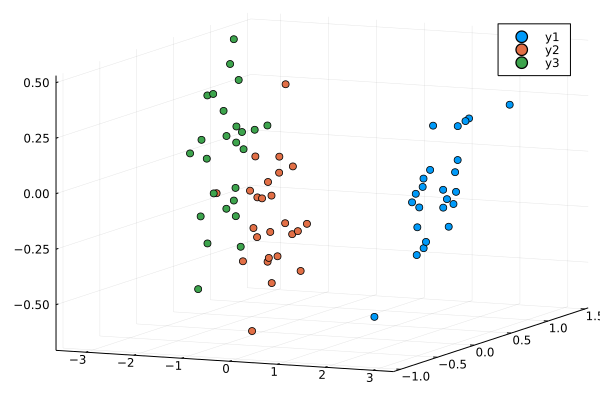

In [36]:
using Plots
scatter(setosa[1,:], setosa[2,:], setosa[3,:], marker=:circle, linewidth=0)
scatter!(versicolor[1,:], versicolor[2,:], versicolor[3,:], marker=:circle, linewidth=0)
scatter!(virginica[1,:], virginica[2,:], virginica[3,:], marker=:circle, linewidth=0)

# 因子分析

In [3]:
using MultivariateStats #多元统计,有很多降维方法

In [4]:
X_train = Array(Array(iris[1:2:end, 1:4])')

4×75 Matrix{Float64}:
 5.1  4.7  5.0  4.6  4.4  5.4  4.8  5.8  …  6.3  6.0  6.7  5.8  6.7  6.3  6.2
 3.5  3.2  3.6  3.4  2.9  3.7  3.0  4.0     3.4  3.0  3.1  2.7  3.3  2.5  3.4
 1.4  1.3  1.4  1.4  1.4  1.5  1.4  1.2     5.6  4.8  5.6  5.1  5.7  5.0  5.4
 0.2  0.2  0.2  0.3  0.2  0.2  0.1  0.2     2.4  1.8  2.4  1.9  2.5  1.9  2.3

In [5]:
model = fit(FactorAnalysis, X_train; maxoutdim=3) #MultivariateStats自带fit

Factor Analysis(indim = 4, outdim = 3)

In [9]:
?model

search: model modifyfield! filemode module Module __module__ RoundingMode



No documentation found.

`model` is of type `FactorAnalysis{Float64}`.

# Summary

```
struct FactorAnalysis{Float64}
```

# Fields

```
mean :: Vector{Float64}
W    :: Matrix{Float64}
Ψ    :: Vector{Float64}
```

# Supertype Hierarchy

```
FactorAnalysis{Float64} <: MultivariateStats.LatentVariableDimensionalityReduction <: MultivariateStats.AbstractDimensionalityReduction <: StatsAPI.RegressionModel <: StatsAPI.StatisticalModel <: Any
```


In [6]:
model.W

4×3 Matrix{Float64}:
 -0.691419   0.262307    0.247204
  0.228736   0.325739   -0.0897514
 -1.77503   -0.0346876   0.0458913
 -0.770069   0.021952   -0.13785

In [7]:
model.mean

4-element Vector{Float64}:
 5.839999999999999
 3.0640000000000005
 3.775999999999999
 1.2186666666666668

In [8]:
model.Ψ

4-element Vector{Float64}:
 0.04151244153497791
 0.023157237040121324
 0.024945096573426324
 0.012837000630026544

# 决策树

In [7]:
using DecisionTree

LoadError: ArgumentError: Package DecisionTree not found in current path:
- Run `import Pkg; Pkg.add("DecisionTree")` to install the DecisionTree package.


In [2]:
?DecisionTree

search: DecisionTree DecisionTreeRegressor DecisionTreeClassifier



No docstring found for module `DecisionTree`.

# Exported names

`AdaBoostStumpClassifier`, `DecisionTreeClassifier`, `DecisionTreeRegressor`, `Ensemble`, `InfoLeaf`, `InfoNode`, `Leaf`, `Node`, `RandomForestClassifier`, `RandomForestRegressor`, `Root`, `apply_adaboost_stumps`, `apply_adaboost_stumps_proba`, `apply_forest`, `apply_forest_proba`, `apply_tree`, `apply_tree_proba`, `build_adaboost_stumps`, `build_forest`, `build_stump`, `build_tree`, `depth`, `fit!`, `get_classes`, `impurity_importance`, `load_data`, `nfoldCV_forest`, `nfoldCV_stumps`, `nfoldCV_tree`, `permutation_importance`, `predict`, `predict_proba`, `print_tree`, `prune_tree`, `split_importance`, `wrap`

# Displaying contents of readme found at `D:\TongYuan\.julia\packages\DecisionTree\8C70W\README.md`

# DecisionTree.jl

[![CI](https://github.com/JuliaAI/DecisionTree.jl/workflows/CI/badge.svg)](https://github.com/JuliaAI/DecisionTree.jl/actions?query=workflow%3ACI) [![Codecov](https://codecov.io/gh/JuliaAI/DecisionTree.jl/branch/master/graph/badge.svg)](https://codecov.io/gh/JuliaAI/DecisionTree.jl) [![Docs Stable](https://img.shields.io/badge/docs-stable-blue.svg)](https://juliahub.com/docs/DecisionTree/pEDeB/0.10.11/)

Julia implementation of Decision Tree (CART) and Random Forest algorithms

Created and developed by Ben Sadeghi (@bensadeghi). Now maintained by the [JuliaAI](https://github.com/JuliaAI) organization.

Available via:

  * [AutoMLPipeline.jl](https://github.com/IBM/AutoMLPipeline.jl) - create complex ML pipeline structures using simple expressions
  * [CombineML.jl](https://github.com/ppalmes/CombineML.jl) - a heterogeneous ensemble learning package
  * [MLJ.jl](https://alan-turing-institute.github.io/MLJ.jl/dev/) - a machine learning framework for Julia
  * [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl) - Julia implementation of the scikit-learn API

## Classification

  * pre-pruning (max depth, min leaf size)
  * post-pruning (pessimistic pruning)
  * multi-threaded bagging (random forests)
  * adaptive boosting (decision stumps), using [SAMME](https://www.intlpress.com/site/pub/pages/journals/items/sii/content/vols/0002/0003/a008/)
  * cross validation (n-fold)
  * support for ordered features (encoded as `Real`s or `String`s)

## Regression

  * pre-pruning (max depth, min leaf size)
  * multi-threaded bagging (random forests)
  * cross validation (n-fold)
  * support for numerical features

**Note that regression is implied if labels/targets are of type Array{Float}**

## Installation

You can install DecisionTree.jl using Julia's package manager

```julia
Pkg.add("DecisionTree")
```

## ScikitLearn.jl API

DecisionTree.jl supports the [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl) interface and algorithms (cross-validation, hyperparameter tuning, pipelines, etc.)

Available models: `DecisionTreeClassifier, DecisionTreeRegressor, RandomForestClassifier, RandomForestRegressor, AdaBoostStumpClassifier`. See each model's help (eg. `?DecisionTreeRegressor` at the REPL) for more information

### Classification Example

Load DecisionTree package

```julia
using DecisionTree
```

Separate Fisher's Iris dataset features and labels

```julia
features, labels = load_data("iris")    # also see "adult" and "digits" datasets

# the data loaded are of type Array{Any}
# cast them to concrete types for better performance
features = float.(features)
labels   = string.(labels)
```

Pruned Tree Classifier

```julia
# train depth-truncated classifier
model = DecisionTreeClassifier(max_depth=2)
fit!(model, features, labels)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
# apply learned model
predict(model, [5.9,3.0,5.1,1.9])
# get the probability of each label
predict_proba(model, [5.9,3.0,5.1,1.9])
println(get_classes(model)) # returns the ordering of the columns in predict_proba's output
# run n-fold cross validation over 3 CV folds
# See ScikitLearn.jl for installation instructions
using ScikitLearn.CrossValidation: cross_val_score
accuracy = cross_val_score(model, features, labels, cv=3)
```

Also, have a look at these [classification](https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Classifier_Comparison_Julia.ipynb) and [regression](https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Decision_Tree_Regression_Julia.ipynb) notebooks.

## Native API

### Classification Example

Decision Tree Classifier

```julia
# train full-tree classifier
model = build_tree(labels, features)
# prune tree: merge leaves having >= 90% combined purity (default: 100%)
model = prune_tree(model, 0.9)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
# apply learned model
apply_tree(model, [5.9,3.0,5.1,1.9])
# apply model to all the sames
preds = apply_tree(model, features)
# generate confusion matrix, along with accuracy and kappa scores
DecisionTree.confusion_matrix(labels, preds)
# get the probability of each label
apply_tree_proba(model, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
# run 3-fold cross validation of pruned tree,
n_folds=3
accuracy = nfoldCV_tree(labels, features, n_folds)

# set of classification parameters and respective default values
# pruning_purity: purity threshold used for post-pruning (default: 1.0, no pruning)
# max_depth: maximum depth of the decision tree (default: -1, no maximum)
# min_samples_leaf: the minimum number of samples each leaf needs to have (default: 1)
# min_samples_split: the minimum number of samples in needed for a split (default: 2)
# min_purity_increase: minimum purity needed for a split (default: 0.0)
# n_subfeatures: number of features to select at random (default: 0, keep all)
# keyword rng: the random number generator or seed to use (default Random.GLOBAL_RNG)
n_subfeatures=0; max_depth=-1; min_samples_leaf=1; min_samples_split=2
min_purity_increase=0.0; pruning_purity = 1.0; seed=3

model    =   build_tree(labels, features,
                        n_subfeatures,
                        max_depth,
                        min_samples_leaf,
                        min_samples_split,
                        min_purity_increase;
                        rng = seed)

accuracy = nfoldCV_tree(labels, features,
                        n_folds,
                        pruning_purity,
                        max_depth,
                        min_samples_leaf,
                        min_samples_split,
                        min_purity_increase;
                        verbose = true,
                        rng = seed)
```

Random Forest Classifier

```julia
# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree, and a maximum tree depth of 6
model = build_forest(labels, features, 2, 10, 0.5, 6)
# apply learned model
apply_forest(model, [5.9,3.0,5.1,1.9])
# get the probability of each label
apply_forest_proba(model, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
# run 3-fold cross validation for forests, using 2 random features per split
n_folds=3; n_subfeatures=2
accuracy = nfoldCV_forest(labels, features, n_folds, n_subfeatures)

# set of classification parameters and respective default values
# n_subfeatures: number of features to consider at random per split (default: -1, sqrt(# features))
# n_trees: number of trees to train (default: 10)
# partial_sampling: fraction of samples to train each tree on (default: 0.7)
# max_depth: maximum depth of the decision trees (default: no maximum)
# min_samples_leaf: the minimum number of samples each leaf needs to have (default: 5)
# min_samples_split: the minimum number of samples in needed for a split (default: 2)
# min_purity_increase: minimum purity needed for a split (default: 0.0)
# keyword rng: the random number generator or seed to use (default Random.GLOBAL_RNG)
#              multi-threaded forests must be seeded with an `Int`
n_subfeatures=-1; n_trees=10; partial_sampling=0.7; max_depth=-1
min_samples_leaf=5; min_samples_split=2; min_purity_increase=0.0; seed=3

model    =   build_forest(labels, features,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          rng = seed)

accuracy = nfoldCV_forest(labels, features,
                          n_folds,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          verbose = true,
                          rng = seed)
```

Adaptive-Boosted Decision Stumps Classifier

```julia
# train adaptive-boosted stumps, using 7 iterations
model, coeffs = build_adaboost_stumps(labels, features, 7);
# apply learned model
apply_adaboost_stumps(model, coeffs, [5.9,3.0,5.1,1.9])
# get the probability of each label
apply_adaboost_stumps_proba(model, coeffs, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
# run 3-fold cross validation for boosted stumps, using 7 iterations
n_iterations=7; n_folds=3
accuracy = nfoldCV_stumps(labels, features,
                          n_folds,
                          n_iterations;
                          verbose = true)
```

### Regression Example

```julia n, m = 10^3, 5 features = randn(n, m) weights = rand(-2:2, m) labels = features * weights

[output truncated to first 200 lines]


## 分类树

### 示例1

In [4]:
features = Array(iris[:, 1:4])#转换类型

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [5]:
using CategoricalArrays
labels = CategoricalArray(iris[:, 5])#转换类型

150-element CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [6]:
model = build_tree(labels, features) #构造树

LoadError: UndefVarError: build_tree not defined

In [68]:
typeof(model)

Root{Float64, CategoricalValue{String, UInt8}}

In [69]:
Root{Float64, String} <: typeof(model)

false

In [12]:
model = prune_tree(model, 0.9) #按90%的比例去修剪tree

Decision Tree
Leaves: 8
Depth:  5

In [170]:
print_tree(model) #打印树的结构，3层

Feature 3 < 2.45 ?
├─ setosa : 50/50
└─ Feature 4 < 1.75 ?
    ├─ Feature 3 < 4.95 ?
        ├─ Feature 4 < 1.65 ?
            ├─ versicolor : 47/47
            └─ virginica : 1/1
        └─ Feature 4 < 1.55 ?
            ├─ virginica : 3/3
            └─ Feature 3 < 5.45 ?
                ├─ versicolor : 2/2
                └─ virginica : 1/1
    └─ Feature 3 < 4.85 ?
        ├─ Feature 2 < 3.1 ?
            ├─ virginica : 2/2
            └─ versicolor : 1/1
        └─ virginica : 43/43


In [173]:
apply_tree(model, [5.9, 3.0, 5.1, 1.9]) #作预测

CategoricalValue{String, UInt8} "virginica"

In [16]:
n_folds = 3
accuracy = nfoldCV_tree(labels, features, n_folds, 0.9) #按90%的比例去修剪tree，并作3折交叉验证


Fold 1
Classes:  ["setosa", "versicolor", "virginica"]
Matrix:   

3×3 Matrix{Int64}:
 15   0   0
  0  19   1
  0   3  12


Accuracy: 0.92
Kappa:    0.878048780487805

Fold 2
Classes:  ["setosa", "versicolor", "virginica"]
Matrix:   

3×3 Matrix{Int64}:
 19   0   0
  0  12   2
  0   0  17


Accuracy: 0.96
Kappa:    0.9393203883495145

Fold 3
Classes:  ["setosa", "versicolor", "virginica"]
Matrix:   

3×3 Matrix{Int64}:
 16   0   0
  0  16   0
  0   1  17


Accuracy: 0.98
Kappa:    0.9699879951980792

Mean Accuracy: 0.9533333333333333


3-element Vector{Float64}:
 0.92
 0.96
 0.98

### 示例2

In [52]:
using CSV, DataFrames
file1 = "D:\\Jupyter notebook\\DataSet\\julia\\fitctreeX.csv"
file2 = "D:\\Jupyter notebook\\DataSet\\julia\\fitctreeY.csv"
X = CSV.read(file1, DataFrame, header = false)
Y = CSV.read(file2, DataFrame, header = false)

,Column1
,String1
1,g
2,b
3,g
4,b
5,g
6,b
7,g
8,b
9,g


In [53]:
features = Array(X)#转换类型

351×34 Matrix{Float64}:
 1.0  0.0   0.99539  -0.05889   0.85243  …  -0.54487   0.18641  -0.453
 1.0  0.0   1.0      -0.18829   0.93035     -0.06288  -0.13738  -0.02447
 1.0  0.0   1.0      -0.03365   1.0         -0.2418    0.56045  -0.38238
 1.0  0.0   1.0      -0.45161   1.0          1.0      -0.32382   1.0
 1.0  0.0   1.0      -0.02401   0.9414      -0.59573  -0.04608  -0.65697
 1.0  0.0   0.02337  -0.00592  -0.09924  …   0.0      -0.00039   0.12011
 1.0  0.0   0.97588  -0.10602   0.94601     -0.81318  -0.13832  -0.80975
 0.0  0.0   0.0       0.0       0.0          1.0       0.0       0.0
 1.0  0.0   0.96355  -0.07198   1.0         -0.72779   0.38895  -0.7342
 1.0  0.0  -0.01864  -0.08459   0.0          0.24086  -0.08208   0.38065
 1.0  0.0   1.0       0.06655   1.0      …  -0.89093   0.22995  -0.89158
 1.0  0.0   1.0      -0.5421    1.0         -1.0       1.0      -1.0
 1.0  0.0   1.0      -0.16316   1.0         -0.64537   0.64727  -0.67226
 ⋮                                       ⋱

In [54]:
labels = Vector(Y.Column1)

351-element Vector{String1}:
 "g"
 "b"
 "g"
 "b"
 "g"
 "b"
 "g"
 "b"
 "g"
 "b"
 "g"
 "b"
 "g"
 ⋮
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"

In [56]:
model = build_tree(labels, features) 

Decision Tree
Leaves: 22
Depth:  9

### 示例3

In [63]:
using CSV, DataFrames
file1 = "D:\\Jupyter notebook\\DataSet\\julia\\fitctreepreX.csv"
file2 = "D:\\Jupyter notebook\\DataSet\\julia\\fitctreeprey.csv"
file3 = "D:\\Jupyter notebook\\DataSet\\julia\\fitctreepreXval.csv"
X = CSV.read(file1, DataFrame, header = false)
y = CSV.read(file2, DataFrame, header = false)
Xnew = CSV.read(file3, DataFrame, header = false)

,Column1,Column2,Column3,Column4
,Float64,Float64,Float64,Float64
1,4.9,3.0,1.4,0.2
2,4.9,3.1,1.5,0.1
3,4.8,3.4,1.6,0.2
4,4.3,3.0,1.1,0.1
5,5.7,4.4,1.5,0.4
6,5.1,3.5,1.4,0.3
7,5.4,3.4,1.7,0.2
8,5.1,3.7,1.5,0.4
9,5.1,3.3,1.7,0.5


In [64]:
X = Array(X)
Xnew = Array(Xnew)
y = Vector(y.Column1)

75-element Vector{String15}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [65]:
model = build_tree(y, X) #构造树

Decision Tree
Leaves: 7
Depth:  5

In [66]:
apply_tree(model, Xnew) #作预测

75-element Vector{String15}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [68]:
apply_tree_proba(model, Xnew, ["setosa", "versicolor", "virginica"])

75×3 Matrix{Float64}:
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 ⋮         
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0

## 回归树

In [68]:
x = iris[1:50, 1:3]
y = iris[1:50, :PetalWidth]
x = Array(x)

50×3 Matrix{Float64}:
 5.1  3.5  1.4
 4.9  3.0  1.4
 4.7  3.2  1.3
 4.6  3.1  1.5
 5.0  3.6  1.4
 5.4  3.9  1.7
 4.6  3.4  1.4
 5.0  3.4  1.5
 4.4  2.9  1.4
 4.9  3.1  1.5
 5.4  3.7  1.5
 4.8  3.4  1.6
 4.8  3.0  1.4
 ⋮         
 4.4  3.0  1.3
 5.1  3.4  1.5
 5.0  3.5  1.3
 4.5  2.3  1.3
 4.4  3.2  1.3
 5.0  3.5  1.6
 5.1  3.8  1.9
 4.8  3.0  1.4
 5.1  3.8  1.6
 4.6  3.2  1.4
 5.3  3.7  1.5
 5.0  3.3  1.4

In [69]:
using DecisionTree
using ScikitLearnBase
model = ScikitLearnBase.fit!(DecisionTreeRegressor(), x, y)

DecisionTreeRegressor
max_depth:                -1
min_samples_leaf:         5
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
root:                     Decision Tree
Leaves: 7
Depth:  4

In [70]:
newX = iris[51:100, 1:3]
newX = Array(newX)
ScikitLearnBase.predict(model, newX)

50-element Vector{Float64}:
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.17777777777777778
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 ⋮
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555
 0.3555555555555555

# 随机森林

In [178]:
using DecisionTree

In [185]:
features, labels = load_data("iris")
features = float.(features)
labels   = string.(labels)

150-element Vector{String}:
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 ⋮
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"

In [186]:
model = build_forest(labels, features, 2, 10, 0.5, 6)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 6.9
Avg Depth:  4.7

In [187]:
apply_forest(model, [5.9,3.0,5.1,1.9])

"Iris-virginica"

In [188]:
apply_forest_proba(model, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

3-element Vector{Float64}:
 0.0
 0.1
 0.9

In [189]:
n_folds=3
n_subfeatures=2
accuracy = nfoldCV_forest(labels, features, n_folds, n_subfeatures)


Fold 1
Classes:  ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
Matrix:   

3×3 Matrix{Int64}:
 21  0   0
  0  9   4
  0  1  15


Accuracy: 0.9
Kappa:    0.8461538461538461

Fold 2
Classes:  ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
Matrix:   

3×3 Matrix{Int64}:
 13   0   0
  0  20   0
  0   2  15


Accuracy: 0.96
Kappa:    0.9388753056234719

Fold 3
Classes:  ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
Matrix:   

3×3 Matrix{Int64}:
 16   0   0
  0  16   1
  0   1  16


Accuracy: 0.96
Kappa:    0.9399759903961584

Mean Accuracy: 0.94


3-element Vector{Float64}:
 0.9
 0.96
 0.96

# 线性回归

In [1]:
using GLM, GLMNet, DataFrames

In [24]:
?GLM

search: GLM glm GLMNet glmnet glmnet! GLMNetPath glmnetcv GLMNetCrossValidation



No docstring found for module `GLM`.

# Exported names

`@formula`, `AbstractContrasts`, `AbstractTerm`, `Bernoulli`, `Binomial`, `CategoricalTerm`, `CauchitLink`, `CloglogLink`, `ConstantTerm`, `ContinuousTerm`, `ContrastsCoding`, `DummyCoding`, `EffectsCoding`, `FormulaTerm`, `FunctionTerm`, `Gamma`, `GeneralizedLinearModel`, `Geometric`, `HelmertCoding`, `HypothesisCoding`, `IdentityLink`, `InteractionTerm`, `InterceptTerm`, `InverseGaussian`, `InverseLink`, `InverseSquareLink`, `LinearModel`, `Link`, `LogLink`, `LogitLink`, `MatrixTerm`, `ModelFrame`, `ModelMatrix`, `NegativeBinomial`, `NegativeBinomialLink`, `Normal`, `Poisson`, `PowerLink`, `ProbitLink`, `RegressionModel`, `SeqDiffCoding`, `SqrtLink`, `StatisticalModel`, `StatsModels`, `Term`, `adjr2`, `adjr²`, `apply_schema`, `canonicallink`, `coef`, `coefnames`, `coeftable`, `concrete_term`, `confint`, `cooksdistance`, `deviance`, `devresid`, `dof`, `dof_residual`, `drop_term`, `fit`, `fit!`, `fitted`, `formula`, `ftest`, `glm`, `hasintercept`, `issubmodel`, `lag`, `lead`, `linpred`, `lm`, `loglikelihood`, `lrtest`, `model_response`, `modelcols`, `modelmatrix`, `negbin`, `nobs`, `nulldeviance`, `nullloglikelihood`, `predict`, `r2`, `residuals`, `response`, `r²`, `schema`, `setcontrasts!`, `stderror`, `term`, `terms`, `vcov`, `width`

# Displaying contents of readme found at `D:\TongYuan\.julia\packages\GLM\P0Ris\README.md`

# Linear and generalized linear models in Julia

|                                  Documentation                                  |       CI Status       |            Coverage             |           DOI           |
|:-------------------------------------------------------------------------------:|:---------------------:|:-------------------------------:|:-----------------------:|
| [![][docs-stable-img]][docs-stable-url] [![][docs-latest-img]][docs-latest-url] | [![][ci-img]][ci-url] | [![][codecov-img]][codecov-url] | [![][DOI-img]][DOI-url] |

[docs-latest-img]: https://img.shields.io/badge/docs-latest-blue.svg [docs-latest-url]: https://JuliaStats.github.io/GLM.jl/dev

[docs-stable-img]: https://img.shields.io/badge/docs-stable-blue.svg [docs-stable-url]: https://JuliaStats.github.io/GLM.jl/stable

[ci-img]: https://github.com/JuliaStats/GLM.jl/workflows/CI-stable/badge.svg [ci-url]: https://github.com/JuliaStats/GLM.jl/actions?query=workflow%3ACI-stable+branch%3Amaster

[codecov-img]: https://codecov.io/gh/JuliaStats/GLM.jl/branch/master/graph/badge.svg?token=cVkd4c3M8H [codecov-url]: https://codecov.io/gh/JuliaStats/GLM.jl

[DOI-img]: https://zenodo.org/badge/DOI/10.5281/zenodo.3376013.svg [DOI-url]: https://doi.org/10.5281/zenodo.3376013


In [3]:
?lm

search: lm glm GLM glmnet glmnet! glmnetcv GLMNet GLMNetPath



```
lm(formula, data, allowrankdeficient=false;
   [wts::AbstractVector], dropcollinear::Bool=true)
lm(X::AbstractMatrix, y::AbstractVector;
   wts::AbstractVector=similar(y, 0), dropcollinear::Bool=true)
```

Fit a linear model to data. An alias for `fit(LinearModel, X, y; wts=wts, dropcollinear=dropcollinear)`

In the first method, `formula` must be a [StatsModels.jl `Formula` object](https://juliastats.org/StatsModels.jl/stable/formula/) and `data` a table (in the [Tables.jl](https://tables.juliadata.org/stable/) definition, e.g. a data frame). In the second method, `X` must be a matrix holding values of the independent variable(s) in columns (including if appropriate the intercept), and `y` must be a vector holding values of the dependent variable.

The keyword argument `wts` can be a `Vector` specifying frequency weights for observations. Such weights are equivalent to repeating each observation a number of times equal to its weight. Do note that this interpretation gives equal point estimates but different standard errors from analytical (a.k.a. inverse variance) weights and from probability (a.k.a. sampling) weights which are the default in some other software.

`dropcollinear` controls whether or not `lm` accepts a model matrix which is less-than-full rank. If `true` (the default), only the first of each set of linearly-dependent columns is used. The coefficient for redundant linearly dependent columns is `0.0` and all associated statistics are set to `NaN`.


## lm模型

### 案例1

In [4]:
data = DataFrame(X = [1,2,3], Y = [2,4,7])
fm = @formula(Y ~ X)
ols = lm(fm, data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -0.666667    0.62361   -1.07    0.4788   -8.59038    7.25704
X             2.5         0.288675   8.66    0.0732   -1.16797    6.16797
─────────────────────────────────────────────────────────────────────────

In [5]:
response(ols)

3-element Vector{Float64}:
 2.0
 4.0
 7.0

In [271]:
coefnames(ols)[1] == "(Intercept)"

true

In [258]:
nobs(ols) #返回拟合模型的独立观测值的数量

3.0

In [250]:
residuals(ols)#残差

3-element Vector{Float64}:
  0.16666666666666963
 -0.33333333333333304
  0.1666666666666643

In [19]:
stderror(ols)

2-element Vector{Float64}:
 0.6236095644623237
 0.2886751345948129

In [294]:
newX = DataFrame(X = [2,3,4])

,X
,Int64
1,2
2,3
3,4


In [296]:
ypre = GLM.predict(ols, newX)

3-element Vector{Union{Missing, Float64}}:
 4.333333333333333
 6.833333333333336
 9.33333333333334

In [297]:
y = [4, 6, 9]

3-element Vector{Int64}:
 4
 6
 9

In [303]:
loss = sum((y-ypre).^2)/length(y)

0.30555555555555813

In [72]:
x = iris[1:50, :SepalWidth]
y = iris[1:50, :SepalLength]
data = DataFrame(X = x, Y = y)

model = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────
               Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────
(Intercept)  2.639     0.310014   8.51    <1e-10   2.01568    3.26233
X            0.69049   0.0898989  7.68    <1e-09   0.509736   0.871244
──────────────────────────────────────────────────────────────────────

拟合后的曲线与原始的曲线做对比

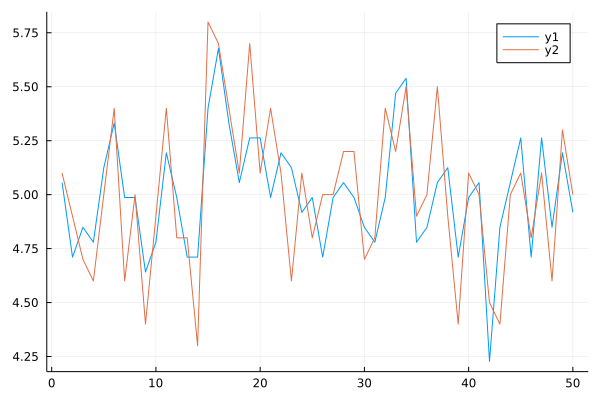

In [61]:
using Plots
plot(GLM.predict(model))
plot!(data[!,:Y])

### 案例2

In [46]:
using CSV, DataFrames
file = "D:\\Jupyter notebook\\DataSet\\julia\\regress.csv"
X = CSV.read(file, DataFrame, header = false)

,Column1,Column2,Column3
,Float64,Int64,Float64
1,130.0,3504,18.0
2,165.0,3693,15.0
3,150.0,3436,18.0
4,150.0,3433,16.0
5,140.0,3449,17.0
6,198.0,4341,15.0
7,220.0,4354,14.0
8,215.0,4312,14.0
9,225.0,4425,14.0


In [47]:
x1 = X[:,2]
x2 = X[:,1]
y = X[:,3]
X = [ones(size(x1)) x1 x2 x1.*x2]

100×4 Matrix{Float64}:
 1.0  3504.0  130.0  455520.0
 1.0  3693.0  165.0  609345.0
 1.0  3436.0  150.0  515400.0
 1.0  3433.0  150.0  514950.0
 1.0  3449.0  140.0  482860.0
 1.0  4341.0  198.0  859518.0
 1.0  4354.0  220.0  957880.0
 1.0  4312.0  215.0  927080.0
 1.0  4425.0  225.0  995625.0
 1.0  3850.0  190.0  731500.0
 1.0  3090.0  115.0  355350.0
 1.0  4142.0  165.0  683430.0
 1.0  4034.0  153.0  617202.0
 ⋮                   
 1.0  2945.0  110.0  323950.0
 1.0  3015.0   85.0  256275.0
 1.0  2585.0   92.0  237820.0
 1.0  2835.0  112.0  317520.0
 1.0  2665.0   96.0  255840.0
 1.0  2370.0   84.0  199080.0
 1.0  2950.0   90.0  265500.0
 1.0  2790.0   86.0  239940.0
 1.0  2130.0   52.0  110760.0
 1.0  2295.0   84.0  192780.0
 1.0  2625.0   79.0  207375.0
 1.0  2720.0   82.0  223040.0

In [48]:
function regress(X, y)
    #数据预处理，合并数据
    function Preprocess(X, y)
        if typeof(X) == DataFrame
            X = Matrix(X)
            X = DataFrame([X y], :auto)
        else
            X = DataFrame([X y], :auto)
        end
        return X
    end
    X = Preprocess(X,y)
    
    #过滤缺失数据
    function Filter(X)
        if typeof(X) == DataFrame
            for i = 1:size(X,2)
                X = filter(names(X)[i] => Column -> !(ismissing(Column) || isnothing(Column) || isnan(Column)), X)
            end
            return X 
        else
            println("Input must be a DataFrame!")
        end
    end
    X = Filter(X)
    
    #数据划分
    function Partition(X)
        x = Matrix(X[:,1:(end-1)])
        y = X[:,end]
        return x, y
    end
    x,y = Partition(X)
    
    #多元线性回归
    ols = lm(x, y)
    return ols
end

regress (generic function with 1 method)

In [49]:
function loss(Mdl, X, y)
    #数据预处理，合并数据
    function Preprocess(X, y)
        if typeof(X) == DataFrame
            X = Matrix(X)
            X = DataFrame([X y], :auto)
        else
            X = DataFrame([X y], :auto)
        end
        return X
    end
    X = Preprocess(X,y)
    
    #过滤缺失数据
    function Filter(X)
        if typeof(X) == DataFrame
            for i = 1:size(X,2)
                X = filter(names(X)[i] => Column -> !(ismissing(Column) || isnothing(Column) || isnan(Column)), X)
            end
            return X 
        else
            println("Input must be a DataFrame!")
        end
    end
    X = Filter(X)
    
    #数据划分
    function Partition(X)
        x = Matrix(X[:,1:(end-1)])
        y = X[:,end]
        return x, y
    end
    x,y = Partition(X)
    
    ypre = GLM.predict(Mdl, x)
    loss = sum((y - ypre) .^ 2) / length(y)
    return loss,y,ypre
end

loss (generic function with 1 method)

In [37]:
function loss1(y,ypre)
    return sum((y - ypre) .^ 2) / length(y)
end

loss1 (generic function with 1 method)

In [39]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
loss1(y_true,y_pred)

0.375

In [50]:
x1 = X[1:50, 2]
x2 = X[1:50, 1]
y = X[1:50, 3]
x = [ones(size(x1)) x1 x2 x1 .* x2]
Mdl = regress(x, y)

xnew1 = X[51:end, 2]
xnew2 = X[51:end, 1]
ynew = X[51:end, 3]
xnew = [ones(size(xnew1)) xnew1 xnew2 xnew1 .* xnew2]

result = loss(Mdl, xnew, ynew)

(451.24848428666235, [70.0, 53.0, 100.0, 78.0, 110.0, 95.0, 71.0, 70.0, 75.0, 72.0  …  92.0, 112.0, 96.0, 84.0, 90.0, 86.0, 52.0, 84.0, 79.0, 82.0], [60.93858267406518, 53.4350847458937, 151.5089731591773, 147.44017498685895, 151.1919239509447, 127.307550264089, 55.020330787056686, 63.739184013453134, 72.45803723984957, 94.12306646907709  …  95.17989716318576, 108.39028083954398, 99.40721993962038, 83.81896720151767, 114.46705733066878, 106.01241177779951, 71.13699887221375, 79.85585209861017, 97.29355855140307, 102.3135043484192])

In [53]:
CSV.write("C:\\Users\\Administrator\\Desktop\\ynew.csv",Tables.table(result[2]))
CSV.write("C:\\Users\\Administrator\\Desktop\\ypre.csv",Tables.table(result[3]))

"C:\\Users\\Administrator\\Desktop\\ypre.csv"

In [32]:
Mdl

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────────────
          Coef.    Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
x1  -41.4155      14.7968       -2.80    0.0074  -71.1665     -11.6644
x2    0.0528415    0.00433664   12.18    <1e-15    0.0441221    0.0615609
x3    0.0        NaN           NaN       NaN     NaN          NaN
x4    0.0        NaN           NaN       NaN     NaN          NaN
─────────────────────────────────────────────────────────────────────────


In [33]:
result

451.24848428666235

### 案例3

In [29]:
using CSV, DataFrames
file = "D:\\Jupyter notebook\\DataSet\\Julia\\response.csv"
X = CSV.read(file, DataFrame, header = true)

,InitialWeight,Program,Subject,Week,y
,Int64,String1,Int64,Int64,Float64
1,218,A,1,2,1.71
2,218,A,1,4,2.1
3,218,A,1,6,2.77
4,218,A,1,8,3.05
5,218,A,1,10,3.28
6,218,A,1,12,3.8
7,158,A,2,2,0.69
8,158,A,2,4,0.66
9,158,A,2,6,0.58


In [ ]:
x = X[!, [:InitialWeight, :Week]]
y = X[!, :y]

In [30]:
ols = lm(Matrix(x), y)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────
         Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────
x1  0.00859515  0.00146605  5.86    <1e-07  0.00569197  0.0114983
x2  0.180013    0.0329407   5.46    <1e-06  0.114782    0.245245
─────────────────────────────────────────────────────────────────


In [31]:
response(ols)

120-element Vector{Float64}:
 1.71
 2.1
 2.77
 3.05
 3.28
 3.8
 0.69
 0.66
 0.58
 0.08
 0.23
 0.12
 2.46
 ⋮
 2.01
 2.39
 2.79
 3.07
 3.64
 3.99
 2.08
 2.6
 3.28
 3.83
 4.36
 5.14

## glm模型

### 案例1

In [11]:
data = DataFrame(X = [0,1,2,3,4], Y = [0.1296,0.0864,0.0576,0.0384,0.0256])
probit = glm(@formula(Y ~ X), data, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -1.14184     1.32729   -0.86    0.3896   -3.74329    1.45961
X            -0.208282    0.659277  -0.32    0.7521   -1.50044    1.08388
─────────────────────────────────────────────────────────────────────────

In [12]:
newX = DataFrame(X = [1,2,3,4])
GLM.predict(probit, newX)

4-element Vector{Union{Missing, Float64}}:
 0.08848881841365536
 0.05956903371757441
 0.03864060473098388
 0.024136013530037453

# 支持向量机

## 分类

In [9]:
using LIBSVM

In [17]:
?LIBSVM.svmtrain

```
svmtrain(
    X::AbstractMatrix{U}, y::AbstractVector{T} = [];
    svmtype::Type = SVC,
    kernel = Kernel.RadialBasis,
    degree::Integer = 3,
    gamma::Float64 = 1.0/size(X, 1),
    coef0::Float64 = 0.0,
    cost::Float64=1.0,
    nu::Float64 = 0.5,
    epsilon::Float64 = 0.1,
    tolerance::Float64 = 0.001,
    shrinking::Bool = true,
    probability::Bool = false,
    weights::Union{Dict{T,Float64},Cvoid} = nothing,
    cachesize::Float64 = 200.0,
    verbose::Bool = false
) where {T,U<:Real}
```

Train Support Vector Machine using LIBSVM using response vector `y` and training data `X`. The shape of `X` needs to be `(nfeatures, nsamples)` or `(nsamples, nsamples)` in the case of precomputed kernel (see below). For one-class SVM use only `X`.

# Arguments

  * `svmtype::Type = LIBSVM.SVC`: Type of SVM to train `SVC` (for C-SVM), `NuSVC`   `OneClassSVM`, `EpsilonSVR` or `NuSVR`. Defaults to `OneClassSVM` if   `y` is not used.
  * `kernel = Kernel.RadialBasis`: Model kernel `Kernels.Linear`, `Kernels.Polynomial`,   `Kernels.RadialBasis`, `Kernels.Sigmoid`, `Kernels.Precomputed` or a `Base.Callable`.
  * `degree::Integer = 3`: Kernel degree. Used for polynomial kernel
  * `gamma::Float64 = 1.0/size(X, 1)` : γ for kernels
  * `coef0::Float64 = 0.0`: parameter for sigmoid and polynomial kernel
  * `cost::Float64 = 1.0`: cost parameter C of C-SVC, epsilon-SVR, and nu-SVR
  * `nu::Float64 = 0.5`: parameter nu of nu-SVC, one-class SVM, and nu-SVR
  * `epsilon::Float64 = 0.1`: epsilon in loss function of epsilon-SVR
  * `tolerance::Float64 = 0.001`: tolerance of termination criterion
  * `shrinking::Bool = true`: whether to use the shrinking heuristics
  * `probability::Bool = false`: whether to train a SVC or SVR model for probability estimates
  * `weights::Union{Dict{T, Float64}, Cvoid} = nothing`: dictionary of class weights
  * `cachesize::Float64 = 200.0`: cache memory size in MB
  * `verbose::Bool = false`: print training output from LIBSVM if true
  * `nt::Integer = 0`: number of OpenMP cores to use, if 0 it is set to OMP*NUM*THREADS, if negative it is set to the max number of threads

Consult LIBSVM documentation for advice on the choise of correct parameters and model tuning.

# Precomputed kernel

In the case of precomputed kernel, the input matrix `X` should be a (symmetric) matrix of shape `(n, n)` where column `i` contains values `[K(x_i, x_1), K(x_i, x_2), ..., K(x_i, x_n)]`. For example, if matrix `M` contains instances in its columns, then `M' * M` produces the correct input matrix `X` for linear kernel.


In [10]:
#划分训练集
X_train = Array(iris[1:2:end, 1:4])'
X_train_labels = Array(iris[1:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [11]:
X_train

4×75 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.7  5.0  4.6  4.4  5.4  4.8  5.8  …  6.3  6.0  6.7  5.8  6.7  6.3  6.2
 3.5  3.2  3.6  3.4  2.9  3.7  3.0  4.0     3.4  3.0  3.1  2.7  3.3  2.5  3.4
 1.4  1.3  1.4  1.4  1.4  1.5  1.4  1.2     5.6  4.8  5.6  5.1  5.7  5.0  5.4
 0.2  0.2  0.2  0.3  0.2  0.2  0.1  0.2     2.4  1.8  2.4  1.9  2.5  1.9  2.3

In [12]:
#划分测试集
X_test = Array(iris[2:2:end, 1:4])'
X_test_labels = Array(iris[2:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [19]:
model = svmtrain(X_train, X_train_labels)

LIBSVM.SVM{String, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.RadialBasis, nothing, 4, 75, 3, ["setosa", "versicolor", "virginica"], Int32[1, 2, 3], Float64[], Int32[], LIBSVM.SupportVectors{Vector{String}, Matrix{Float64}}(30, Int32[5, 13, 12], ["setosa", "setosa", "setosa", "setosa", "setosa", "versicolor", "versicolor", "versicolor", "versicolor", "versicolor"  …  "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"], [4.4 5.8 … 5.8 6.3; 2.9 4.0 … 2.7 2.5; 1.4 1.2 … 5.1 5.0; 0.2 0.2 … 1.9 1.9], Int32[5, 8, 10, 13, 23, 26, 27, 28, 29, 31  …  56, 57, 58, 59, 60, 64, 68, 70, 72, 74], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 4.4), LIBSVM.SVMNode(1, 5.8), LIBSVM.SVMNode(1, 5.7), LIBSVM.SVMNode(1, 4.8), LIBSVM.SVMNode(1, 5.1), LIBSVM.SVMNode(1, 7.0), LIBSVM.SVMNode(1, 6.9), LIBSVM.SVMNode(1, 6.5), LIBSVM.SVMNode(1, 6.3), LIBSVM.SVMNode(1, 5.0)  …  LIBSVM.SVMNode(1, 6.5), LIBSVM.SVMNode(1, 6.8), LIBSVM.SVMNode(1, 5.8), LIBSV

In [14]:
(predicted_labels, decision_values) = svmpredict(model ,X_test)

(["setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa"  …  "virginica", "versicolor", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"], [1.0795373127217927 1.076285347307982 … -0.8977486201494334 -0.9364766069276098; 1.1004210525961036 1.0767138900115192 … -1.0382989966396097 -1.0734485152396267; 0.26369235850072076 0.2543044167727957 … -0.5718494685608961 -0.31568093085243765])

In [18]:
decision_values

3×75 Matrix{Float64}:
 1.07954   1.07629   1.05125   1.16964   …  -0.809238  -0.897749  -0.936477
 1.10042   1.07671   1.03685   1.1533       -1.00333   -1.0383    -1.07345
 0.263692  0.254304  0.358478  0.282262     -0.810783  -0.571849  -0.315681

In [15]:
predicted_labels

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "versicolor"
 "virginica"
 "virginica"
 "versicolor"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [42]:
using Statistics
mean(predicted_labels .== X_test_labels)*1.0

0.9333333333333333

## 回归

In [49]:
x = iris[1:50, 1:3]
y = iris[1:50, :PetalWidth]
x = Array(x)

50×3 Matrix{Float64}:
 5.1  3.5  1.4
 4.9  3.0  1.4
 4.7  3.2  1.3
 4.6  3.1  1.5
 5.0  3.6  1.4
 5.4  3.9  1.7
 4.6  3.4  1.4
 5.0  3.4  1.5
 4.4  2.9  1.4
 4.9  3.1  1.5
 5.4  3.7  1.5
 4.8  3.4  1.6
 4.8  3.0  1.4
 ⋮         
 4.4  3.0  1.3
 5.1  3.4  1.5
 5.0  3.5  1.3
 4.5  2.3  1.3
 4.4  3.2  1.3
 5.0  3.5  1.6
 5.1  3.8  1.9
 4.8  3.0  1.4
 5.1  3.8  1.6
 4.6  3.2  1.4
 5.3  3.7  1.5
 5.0  3.3  1.4

In [51]:
using LIBSVM
using ScikitLearnBase
model = ScikitLearnBase.fit!(LinearSVC(), x, y)

LinearSVC(LIBSVM.Linearsolver.L2R_L2LOSS_SVC_DUAL, nothing, Inf, 1.0, 0.1, -1.0, false, LIBLINEAR.LinearModel{Float64}(1, 6, 3, [0.344581539528367, -0.5777410997422869, 0.09604602535635301, -0.20686875000391053, -0.1618377442721132, -0.2740495954543961, -0.3820621342026306, 0.5782240541168084, -0.2616131652021456, 0.15625954991546348, -0.18448316180308463, 0.056611409806331905, -0.1960443364613116, 0.1013655327654417, -0.25112499057220145, -0.21551986961694858, 0.298778690355661, 0.13798015371235559], Int32[1, 2, 3, 4, 5, 6], [0.2, 0.4, 0.3, 0.1, 0.5, 0.6], -1.0))

In [59]:
newX = iris[51:100, 1:3]
newX = Array(newX)
ScikitLearnBase.predict(model, newX)

50-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 ⋮
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2
 0.2

# k 均值聚类

In [14]:
using Clustering #聚类

In [15]:
?Clustering.kmeans

```
kmeans(X, k, [...]) -> KmeansResult
```

K-means clustering of the $d×n$ data matrix `X` (each column of `X` is a $d$-dimensional data point) into `k` clusters.

# Arguments

  * `init` (defaults to `:kmpp`): how cluster seeds should be initialized, could be one of the following:

      * a `Symbol`, the name of a seeding algorithm (see [Seeding](@ref) for a list of supported methods);
      * an instance of [`SeedingAlgorithm`](@ref);
      * an integer vector of length $k$ that provides the indices of points to use as initial seeds.
  * `weights`: $n$-element vector of point weights (the cluster centers are the weighted means of cluster members)
  * `maxiter`, `tol`, `display`: see [common options](@ref common_options)


In [16]:
features = Array(iris[:, 1:4])
#labels = Array(iris[:, 5])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [17]:
#initseeds(:rand, features', 3)#选取三个初始点
result = Clustering.kmeans(features', 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([6.853846153846153 5.005999999999999 5.88360655737705; 3.0769230769230766 3.428000000000001 2.740983606557377; 5.715384615384615 1.4620000000000002 4.388524590163935; 2.053846153846153 0.2459999999999999 1.4344262295081966], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 3, 1, 1, 3], [0.019980000000018094, 0.20038000000000977, 0.17398000000001446, 0.2759800000000041, 0.03557999999999595, 0.45838000000000534, 0.17238000000000397, 0.004380000000011819, 0.6519799999999947, 0.1415800000000189  …  0.1573372781064677, 0.4419526627218886, 0.7316259070142337, 0.1127218934910843, 0.2727218934911093, 0.3557988165680399, 0.8221177102929005, 0.3996449704141867, 0.6919526627218318, 0.7071996775060256], [39, 50, 61], [39, 50, 61], 78.85566582597659, 11, true)

In [19]:
result.centers'

3×4 adjoint(::Matrix{Float64}) with eltype Float64:
 6.85385  3.07692  5.71538  2.05385
 5.006    3.428    1.462    0.246
 5.88361  2.74098  4.38852  1.43443

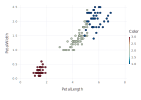

In [12]:
using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = result.assignments, Geom.point)

# k-中心点聚类

In [16]:
using Clustering #聚类

In [32]:
?kmedoids

search: kmedoids kmedoids! KmedoidsResult



```
kmedoids(dist::AbstractMatrix, k::Integer; ...) -> KmedoidsResult
```

Perform K-medoids clustering of $n$ points into `k` clusters, given the `dist` matrix ($n×n$, `dist[i, j]` is the distance between the `j`-th and `i`-th points).

# Arguments

  * `init` (defaults to `:kmpp`): how medoids should be initialized, could be one of the following:

      * a `Symbol` indicating the name of a seeding algorithm (see [Seeding](@ref Seeding) for a list of supported methods).
      * an integer vector of length `k` that provides the indices of points to use as initial medoids.
  * `maxiter`, `tol`, `display`: see [common options](@ref common_options)

# Note

The function implements a *K-means style* algorithm instead of *PAM* (Partitioning Around Medoids). K-means style algorithm converges in fewer iterations, but was shown to produce worse (10-20% higher total costs) results (see e.g. [Schubert & Rousseeuw (2019)](@ref kmedoid_refs)).


In [17]:
features = Array(iris[:, 1:4])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [22]:
using Distances
dist = pairwise(SqEuclidean(), features', dims=2)
@assert size(dist) == (150, 150)

In [23]:
dist

150×150 Matrix{Float64}:
  0.0    0.29   0.26   0.42   0.02  …  21.66  18.29  19.89  21.63  17.14
  0.29   0.0    0.09   0.11   0.37     22.09  18.06  20.24  22.26  17.25
  0.26   0.09   0.0    0.06   0.26     23.66  19.63  21.73  23.51  18.48
  0.42   0.11   0.06   0.0    0.42     22.52  18.39  20.55  22.27  17.22
  0.02   0.37   0.26   0.42   0.0      22.1   18.75  20.29  21.89  17.42
  0.38   1.19   1.18   1.36   0.38  …  18.36  15.91  16.83  18.19  14.58
  0.27   0.26   0.07   0.11   0.21     23.01  19.22  21.1   22.56  17.79
  0.03   0.18   0.17   0.25   0.05     21.15  17.64  19.34  21.06  16.49
  0.85   0.26   0.19   0.09   0.85     24.15  19.62  22.1   23.9   18.51
  0.22   0.03   0.1    0.1    0.28     21.78  17.81  19.87  21.83  16.86
  0.14   0.75   0.78   1.0    0.18  …  20.28  17.39  18.63  20.35  16.26
  0.14   0.21   0.14   0.14   0.12     21.14  17.51  19.25  20.81  16.18
  0.35   0.02   0.07   0.07   0.41     22.89  18.7   20.94  22.96  17.79
  ⋮                       

In [28]:
result = kmedoids(dist, 3)

KmedoidsResult{Float64}([79, 8, 121], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 1, 3, 3, 3, 1, 3, 3, 1], [0.030000000000001137, 0.18000000000000682, 0.1699999999999875, 0.25, 0.04999999999999716, 0.4900000000000233, 0.1799999999999926, 0.0, 0.6200000000000045, 0.10999999999999943  …  0.06999999999999318, 0.3699999999999761, 0.5999999999999943, 0.049999999999954525, 0.09000000000000341, 0.3300000000000125, 0.6599999999999966, 0.5400000000000205, 0.6199999999999477, 0.469999999999942], [65, 50, 35], 83.90999999999936, 5, true)

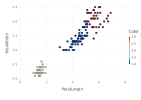

In [29]:
using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = result.assignments, Geom.point)

# 基于密度的含噪数据空间聚类

In [1]:
using Clustering #聚类

In [38]:
?dbscan

search: dbscan DbscanResult DbscanCluster



```
dbscan(D::AbstractMatrix, eps::Real, minpts::Int) -> DbscanResult
```

Perform DBSCAN algorithm using the distance matrix `D`.

# Arguments

The following options control which points would be considered *density reachable*:

  * `eps::Real`: the radius of a point neighborhood
  * `minpts::Int`: the minimum number of neighboring points (including itself)  to qualify a point as a density point.

---

```
dbscan(points::AbstractMatrix, radius::Real,
       [leafsize], [min_neighbors], [min_cluster_size]) -> Vector{DbscanCluster}
```

Cluster `points` using the DBSCAN (density-based spatial clustering of applications with noise) algorithm.

# Arguments

  * `points`: the $d×n$ matrix of points. `points[:, j]` is a $d$-dimensional coordinates of $j$-th point
  * `radius::Real`: query radius

Optional keyword arguments to control the algorithm:

  * `leafsize::Int` (defaults to 20): the number of points binned in each leaf node in the `KDTree`
  * `min_neighbors::Int` (defaults to 1): the minimum number of a *core* point neighbors
  * `min_cluster_size::Int` (defaults to 1): the minimum number of points in a valid cluster

# Example

```julia
points = randn(3, 10000)
# DBSCAN clustering, clusters with less than 20 points will be discarded:
clusters = dbscan(points, 0.05, min_neighbors = 3, min_cluster_size = 20)
```


In [90]:
points = randn(3, 10000)
clusters = dbscan(features', 0.05, min_neighbors = 3)

150-element Vector{DbscanCluster}:
 DbscanCluster(1, Int64[], [1])
 DbscanCluster(1, Int64[], [2])
 DbscanCluster(1, Int64[], [3])
 DbscanCluster(1, Int64[], [4])
 DbscanCluster(1, Int64[], [5])
 DbscanCluster(1, Int64[], [6])
 DbscanCluster(1, Int64[], [7])
 DbscanCluster(1, Int64[], [8])
 DbscanCluster(1, Int64[], [9])
 DbscanCluster(1, Int64[], [10])
 DbscanCluster(1, Int64[], [11])
 DbscanCluster(1, Int64[], [12])
 DbscanCluster(1, Int64[], [13])
 ⋮
 DbscanCluster(1, Int64[], [139])
 DbscanCluster(1, Int64[], [140])
 DbscanCluster(1, Int64[], [141])
 DbscanCluster(1, Int64[], [142])
 DbscanCluster(2, Int64[], [102, 143])
 DbscanCluster(1, Int64[], [144])
 DbscanCluster(1, Int64[], [145])
 DbscanCluster(1, Int64[], [146])
 DbscanCluster(1, Int64[], [147])
 DbscanCluster(1, Int64[], [148])
 DbscanCluster(1, Int64[], [149])
 DbscanCluster(1, Int64[], [150])

In [5]:
features = Array(iris[:, 1:4])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [94]:
a ,b = size(features)

(150, 4)

In [95]:
a

150

In [92]:
using Distances
dist = pairwise(SqEuclidean(), features', dims=2)
@assert size(dist) == (150, 150)

In [82]:
clusters = dbscan(dist, 0.16, 9)

DbscanResult([1, 83, 87], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [44, 18, 10])

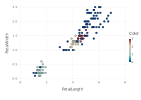

In [83]:
using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = clusters.assignments, Geom.point)

# 谱聚类

In [3]:
using MLJ
@load SpectralClustering pkg = ScikitLearn verbosity=0

MLJScikitLearnInterface.SpectralClustering

In [4]:
using MLJBase

In [5]:
?MLJScikitLearnInterface.SpectralClustering

```
SpectralClustering
```

A model type for constructing a spectral clustering, based on [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl), and implementing the MLJ model interface.

From MLJ, the type can be imported using

```
SpectralClustering = @load SpectralClustering pkg=ScikitLearn
```

Do `model = SpectralClustering()` to construct an instance with default hyper-parameters. Provide keyword arguments to override hyper-parameter defaults, as in `SpectralClustering(n_clusters=...)`.

Apply clustering to a projection of the normalized Laplacian.  In practice spectral clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.


In [6]:
features = Array(iris[:, 1:4])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [11]:
model = MLJScikitLearnInterface.SpectralClustering(n_clusters=3, assign_labels = "discretize")

SpectralClustering(
    n_clusters = 3,
    eigen_solver = nothing,
    random_state = nothing,
    n_init = 10,
    gamma = 1.0,
    affinity = "rbf",
    n_neighbors = 10,
    eigen_tol = 0.0,
    assign_labels = "discretize",
    n_jobs = nothing)

In [12]:
f, = MLJBase.fit(model, 1, features)

(PyObject SpectralClustering(assign_labels='discretize', n_clusters=3), nothing, NamedTuple())

In [13]:
fp = MLJBase.fitted_params(model, f)

(labels = CategoricalArrays.CategoricalValue{Int64, UInt32}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2],
 affinity_matrix = [1.0 0.7482635675785552 … 4.0384095145452785e-10 3.5990889498641045e-8; 0.7482635675785552 1.0 … 2.1508237965550843e-10 3.224186737256779e-8; … ; 4.0384095145452785e-10 2.1508237965550843e-10 … 1.0 0.5543272847345287; 3.5990889498641045e-8 3.224186737256779e-8 … 0.5543272847345287 1.0],)

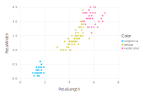

In [77]:
fps = Vector{String}(undef, length(fp.labels)) #指定长度固定的、类型固定的向量
for i = 1:length(fp.labels)
    if fp.labels[i] == 1
        fps[i] = "setosa"
    elseif fp.labels[i] == 2
        fps[i] = "versicolor"
    else
        fps[i] = "virginica"
    end
end

using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = fps, Geom.point)

# 高斯过程回归

In [77]:
using MLJ

In [78]:
using MLJScikitLearnInterface

In [79]:
@load GaussianProcessRegressor verbosity=0

GaussianProcessRegressor

In [80]:
using StableRNGs
using MLJScikitLearnInterface
using Test
import MLJBase
import ScikitLearn
import MLJBase: target_scitype, input_scitype, output_scitype

In [92]:
function simple_regression(n=100, p=3; sigma=0.1, σ=sigma, seed=6168901234)
    r1 = StableRNG(seed)
    r2 = StableRNG(1234)
    X = hcat(randn(r1, n, p), ones(n))
    θ = randn(r1, p + 1)
    y = X * θ + σ * randn(r1, n)
    X_new = hcat(randn(r2, n, p), ones(n))
    ŷ = X * (X \ y)
    return X, y,X_new, rmse(y, ŷ)
end

simple_regression (generic function with 3 methods)

In [93]:
X, y, X_new, ls = simple_regression()

([-0.2067714848153953 1.2642953995534556 0.3225385207735009 1.0; 0.7495379375146425 -0.7679790922159597 -0.8650550258335482 1.0; … ; -2.721847535801414 -0.12510435549251755 1.237822459124733 1.0; 0.6923951571556931 -0.17350018641724435 -1.3246255817342552 1.0], [-1.2410619479214349, -0.2693491147390253, -1.4569550474961603, 1.3633265514088473, 1.7291010262061772, -0.6685153859499253, -0.9582221873639527, 0.5997601743101164, 1.1336546185515513, 0.5608068348815485  …  -1.2556401753228457, -0.569619967582065, 0.33332163095455547, -0.16143608867757303, -0.9048009479915957, -0.28520253392645983, 0.4760610330315719, -0.03532982961568065, 2.590145344749641, -0.9722013335834327], [0.5194945485037596 1.360309087159244 -0.20639832747120868 1.0; 0.9051397268611271 1.2154571281883968 0.1480770621017797 1.0; … ; 0.15325693498596463 -0.5840010962176628 -0.9427190173435039 1.0; 2.3326724509854704 -1.0097822653475557 0.8636746688149561 1.0], 0.09105745827255365)

In [96]:
model= MLJBase.fit(GaussianProcessRegressor(), 1, X, y)

((PyObject GaussianProcessRegressor(), nothing, nothing), nothing, NamedTuple())

In [99]:
model = model[1]
ŷ = MLJBase.predict(GaussianProcessRegressor(), model, X_new)

100-element Vector{Float64}:
 -2.115530642118756
 -0.7918491383916262
 -0.32282749049863924
  0.9124938785507766
  1.9200365629048974
 -1.9431218799236376
  0.7938085192072322
 -0.6843956860502658
 -0.5543121124020445
 -2.6708699326784426
 -1.5030220759667827
 -2.3816491747274995
  4.112463835299877
  ⋮
 -0.007707283930358244
  0.5576893226239008
 -0.06679607524438325
 -0.6500495825966937
  1.2049399798124796
 -1.400300706393864
  1.5068838745028188
  0.8444650847213779
 -0.22968931025206984
 -2.7732351577069494
 -0.6231734565808438
 -1.2582955426149738

# Lasso回归

In [155]:
using MLJLinearModels

In [157]:
?MLJLinearModels.LassoRegressor

Lasso regression model with objective function

$|Xθ - y|₂²/2 + n⋅λ|θ|₁$

where $n$ is the number of samples `size(X, 1)`. With `scale_penalty_with_samples = false` the objective function is $|Xθ - y|₂²/2 + λ|θ|₁$

## Parameters

  * `lambda::Real`

    strength of the L1 regularisation. Default: 1.0
  * `fit_intercept::Bool`

    whether to fit the intercept or not. Default: true
  * `penalize_intercept::Bool`

    whether to penalize the intercept. Default: false
  * `scale_penalty_with_samples::Bool`

    whether to scale the penalty with the number of samples. Default: true
  * `solver::Union{Nothing, MLJLinearModels.Solver}`

    type of solver to use (if `nothing` the default is used). Either `FISTA` or     `ISTA` can be used (proximal methods, with/without acceleration). Default: nothing

## Example

```
using MLJ
X, y = make_regression()
mach = fit!(machine(LassoRegressor(), X, y))
predict(mach, X)
fitted_params(mach)
```


In [158]:
using MLJ
X, y = make_regression()

(Tables.MatrixTable{Matrix{Float64}} with 100 rows, 2 columns, and schema:
 :x1  Float64
 :x2  Float64, [-0.5895722538821041, -0.23157118579657307, 0.6710634555839801, 0.06839833061362727, 0.3940397015976086, 1.0995326986080574, 0.7966690519967581, 1.9373754934537133, 0.1494317638697816, 0.46602409264514466  …  -2.02773026006812, -0.10501901072973976, -1.4366544400908228, 1.141698518109128, 1.0151528297408483, -1.1164612727077727, 0.17498083158927488, -0.49905836780922896, -0.7076505420187548, 1.3831394183974606])

In [169]:
model = MLJBase.fit!(machine(LassoRegressor(), X, y))

┌ Info: Training Machine{LassoRegressor,…}.
└ @ MLJBase D:\TongYuan\.julia\packages\MLJBase\CMT6L\src\machines.jl:464
┌ Info: Solver: ProxGrad
│   accel: Bool true
│   max_iter: Int64 1000
│   tol: Float64 0.0001
│   max_inner: Int64 100
│   beta: Float64 0.8
└ @ MLJLinearModels D:\TongYuan\.julia\packages\MLJLinearModels\eRCwo\src\mlj\interface.jl:39


Machine{LassoRegressor,…} trained 1 time; caches data
  model: LassoRegressor
  args: 
    1:	Source @520 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @357 ⏎ `AbstractVector{Continuous}`


In [170]:
MLJBase.predict(model, X)

100-element Vector{Float64}:
 0.34275420174655336
 0.3219381486392704
 0.38770352552470605
 0.35516451180423364
 0.3817698706258886
 0.38424222458085583
 0.39084664881387765
 0.45162440775082313
 0.3392819224547837
 0.36755137406483723
 0.43785798202678844
 0.333699773296706
 0.27930227132391616
 ⋮
 0.41928389418357737
 0.39888212385898464
 0.22033635756090936
 0.30227197823375734
 0.33010394855926073
 0.3894807600046969
 0.3837791090737523
 0.2633425990976961
 0.38530565254197385
 0.2830242970818409
 0.285440344708417
 0.41409259414070254

In [171]:
fitted_params(model)

(coefs = [:x1 => -0.06305794762967709, :x2 => -0.0],
 intercept = 0.3741837562008282,)

# 判别分析

## 降维

In [378]:
using MultivariateStats

In [351]:
?MultivariateStats.MulticlassLDA

A multi-class linear discriminant model type has following fields:

  * `proj` is the projection matrix
  * `pmeans` is the projected means of all classes
  * `stats` is an instance of [`MulticlassLDAStats`](@ref) type that captures all statistics computed to train the model (which we will discuss later).


In [90]:
?MultivariateStats.fit

Fit a statistical model.

---

```
fit(Histogram, data[, weight][, edges]; closed=:left, nbins)
```

Fit a histogram to `data`.

# Arguments

  * `data`: either a vector (for a 1-dimensional histogram), or a tuple of vectors of equal length (for an *n*-dimensional histogram).
  * `weight`: an optional `AbstractWeights` (of the same length as the data vectors), denoting the weight each observation contributes to the bin. If no weight vector is supplied, each observation has weight 1.
  * `edges`: a vector (typically an `AbstractRange` object), or tuple of vectors, that gives the edges of the bins along each dimension. If no edges are provided, these are determined from the data.

# Keyword arguments

  * `closed`: if `:left` (the default), the bin intervals are left-closed [a,b); if `:right`, intervals are right-closed (a,b].
  * `nbins`: if no `edges` argument is supplied, the approximate number of bins to use along each dimension (can be either a single integer, or a tuple of integers).

# Examples

```julia
# Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:right)

# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
```

---

```
fit(ZScoreTransform, X; dims=nothing, center=true, scale=true)
```

Fit standardization parameters to vector or matrix `X` and return a `ZScoreTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion; if `2` fit in row-wise fashion. The default is `nothing`, which is equivalent to `dims=2` with a deprecation warning.
  * `center`: if `true` (the default) center data so that its mean is zero.
  * `scale`: if `true` (the default) scale the data so that its variance is equal to one.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Matrix{Float64}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(ZScoreTransform, X, dims=2)
ZScoreTransform{Float64, Vector{Float64}}(2, 2, [0.0, 1.0], [0.5, 1.0])

julia> StatsBase.transform(dt, X)
2×3 Matrix{Float64}:
  0.0  -1.0  1.0
 -1.0   0.0  1.0
```

---

```
fit(UnitRangeTransform, X; dims=nothing, unit=true)
```

Fit a scaling parameters to vector or matrix `X` and return a `UnitRangeTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion;

if `2` fit in row-wise fashion. The default is `nothing`.

  * `unit`: if `true` (the default) shift the minimum data to zero.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Matrix{Float64}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(UnitRangeTransform, X, dims=2)
UnitRangeTransform{Float64, Vector{Float64}}(2, 2, true, [-0.5, 0.0], [1.0, 0.5])

julia> StatsBase.transform(dt, X)
2×3 Matrix{Float64}:
 0.5  0.0  1.0
 0.0  0.5  1.0
```

---

```
fit(Whitening, X::AbstractMatrix{T}; kwargs...)
```

Estimate a whitening transform from the data given in `X`.

This function returns an instance of [`Whitening`](@ref)

**Keyword Arguments:**

  * `regcoef`: The regularization coefficient. The covariance will be regularized as follows when `regcoef` is positive `C + (eigmax(C) * regcoef) * eye(d)`. Default values is `zero(T)`.
  * `dims`: if `1` the transformation calculated from the row samples. fit standardization parameters in column-wise fashion; if `2` the transformation calculated from the column samples. The default is `nothing`, which is equivalent to `dims=2` with a deprecation warning.
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (**default**)
      * a pre-computed mean vector

**Note:** This function internally relies on [`cov_whitening`](@ref) to derive the transformation `W`.

---

```
fit(PCA, X; ...)
```

Perform PCA over the data given in a matrix `X`. Each column of `X` is an **observation**.

**Keyword arguments**

  * `method`: The choice of methods:

      * `:auto`: use `:cov` when `d < n` or `:svd` otherwise (*default*).
      * `:cov`: based on covariance matrix decomposition.
      * `:svd`: based on SVD of the input data.
  * `maxoutdim`: The output dimension, i.e. dimension of the transformed space (*min(d, nc-1)*)
  * `pratio`: The ratio of variances preserved in the principal subspace (*0.99*)
  * `mean`: The mean vector, which can be either of

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector

**Notes:**

  * The output dimension `p` depends on both `maxoutdim` and `pratio`, as follows. Suppose the first `k` principal components preserve at least `pratio` of the total variance, while the first `k-1` preserves less than `pratio`, then the actual output dimension will be $\min(k, maxoutdim)$.
  * This function calls [`pcacov`](@ref) or [`pcasvd`](@ref) internally, depending on the choice of method.

---

```
fit(PPCA, X; ...)
```

Perform probabilistic PCA over the data given in a matrix `X`. Each column of `X` is an observation. This method returns an instance of [`PPCA`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `method`: The choice of methods:

      * `:ml`: use maximum likelihood version of probabilistic PCA (*default*)
      * `:em`: use EM version of probabilistic PCA
      * `:bayes`: use Bayesian PCA
  * `maxoutdim`: Maximum output dimension (*default* `d-1`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `tol`: Convergence tolerance (*default* `1.0e-6`)
  * `maxiter`: Maximum number of iterations (*default* `1000`)

**Notes:** This function calls [`ppcaml`](@ref), [`ppcaem`](@ref) or [`bayespca`](@ref) internally, depending on the choice of method.

---

Fit `KernelCenter` object

---

```
fit(KernelPCA, X; ...)
```

Perform kernel PCA over the data given in a matrix `X`. Each column of `X` is an observation.

This method returns an instance of [`KernelPCA`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `kernel`: The kernel function. This functions accepts two vector arguments `x` and `y`,

and returns a scalar value (*default:* `(x,y)->x'y`)

  * `solver`: The choice of solver:

      * `:eig`: uses `LinearAlgebra.eigen` (*default*)
      * `:eigs`: uses `Arpack.eigs` (always used for sparse data)
  * `maxoutdim`:  Maximum output dimension (*default* `min(d, n)`)
  * `inverse`: Whether to perform calculation for inverse transform for non-precomputed kernels (*default* `false`)
  * `β`: Hyperparameter of the ridge regression that learns the inverse transform (*default* `1` when `inverse` is `true`).
  * `tol`: Convergence tolerance for `eigs` solver (*default* `0.0`)
  * `maxiter`: Maximum number of iterations for `eigs` solver (*default* `300`)

---

```
fit(CCA, X, Y; ...)
```

Perform CCA over the data given in matrices `X` and `Y`. Each column of `X` and `Y` is an observation.

`X` and `Y` should have the same number of columns (denoted by `n` below).

This method returns an instance of [`CCA`](@ref).

**Keyword arguments:**

  * `method`: The choice of methods:

      * `:cov`: based on covariance matrices
      * `:svd`: based on SVD of the input data (*default*)
  * `outdim`: The output dimension, *i.e* dimension of the common space (*default*: `min(dx, dy, n)`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector

**Notes:** This function calls [`ccacov`](@ref) or [`ccasvd`](@ref) internally, depending on the choice of method.

---

```
fit(MDS, X; kwargs...)
```

Compute an embedding of `X` points by classical multidimensional scaling (MDS). There are two calling options, specified via the required keyword argument `distances`:

```
mds = fit(MDS, X; distances=false, maxoutdim=size(X,1)-1)
```

where `X` is the data matrix. Distances between pairs of columns of `X` are computed using the Euclidean norm. This is equivalent to performing PCA on `X`.

```
mds = fit(MDS, D; distances=true, maxoutdim=size(D,1)-1)
```

where `D` is a symmetric matrix `D` of distances between points.

---

```
fit(LinearDiscriminant, Xp, Xn; covestimator = SimpleCovariance())
```

Performs LDA given both positive and negative samples. The function accepts follwing parameters:

**Parameters**

  * `Xp`: The sample matrix of the positive class.
  * `Xn`: The sample matrix of the negative class.

**Keyword arguments:**

  * `covestimator`: Custom covariance estimator for between-class covariance. The covariance matrix will be calculated as `cov(covestimator_between, #=data=#; dims=2, mean=zeros(#=...=#)`. Custom covariance estimators, available in other packages, may result in more robust discriminants for data with more features than observations.

---

```
fit(MulticlassLDA, nc, X, y; ...)
```

Perform multi-class LDA over a given data set `X` and collecttion of labels `y`.

This function returns the resultant multi-class LDA model as an instance of [`MulticlassLDA`](@ref).

*Parameters*

  * `nc`:  the number of classes
  * `X`:   the matrix of input samples, of size `(d, n)`. Each column in `X` is an observation.
  * `y`:   the vector of class labels, of length `n`. Each element of `y` must be an integer between `1` and `nc`.

**Keyword arguments**

  * `method`: The choice of methods:

      * `:gevd`: based on generalized eigenvalue decomposition (*default*).
      * `:whiten`: first derive a whitening transform from `Sw` and then solve the problem based on eigenvalue

    decomposition of the whiten `Sb`.
  * `outdim`: The output dimension, i.e. dimension of the transformed space `min(d, nc-1)`
  * `regcoef`: The regularization coefficient (*default:* `1.0e-6`). A positive value `regcoef * eigmax(Sw)`   is added to the diagonal of `Sw` to improve numerical stability.
  * `covestimator_between`: Custom covariance estimator for between-class covariance (*default:* `SimpleCovariance()`).   The covariance matrix will be calculated as `cov(covestimator_between, #=data=#; dims=2, mean=zeros(#=...=#))`.   Custom covariance estimators, available in other packages, may result in more robust discriminants for data   with more features than observations.
  * `covestimator_within`:  Custom covariance estimator for within-class covariance (*default:* `SimpleCovariance()`).   The covariance matrix will be calculated as `cov(covestimator_within, #=data=#; dims=2, mean=zeros(nc))`.   Custom covariance estimators, available in other packages, may result in more robust discriminants for data   with more features than observations.

**Notes:**

The resultant projection matrix $P$ satisfies:

$$
\mathbf{P}^T (\mathbf{S}_w + \kappa \mathbf{I}) \mathbf{P} = \mathbf{I}
$$

Here, $\kappa$ equals `regcoef * eigmax(Sw)`. The columns of $P$ are arranged in descending order of the corresponding generalized eigenvalues.

Note that [`MulticlassLDA`](@ref) does not currently support the normalized version using $\mathbf{S}_w^*$ and $\mathbf{S}_b^*$ (see [`SubspaceLDA`](@ref)).

---

```
fit(SubspaceLDA, X, labels; normalize=true)
```

Fit an subspace projection of LDA model using the equivalent of $\mathbf{S}_w^*$ and $\mathbf{S}_b^*$`.

Note: Subspace LDA also supports the normalized version of LDA via the `normalize` keyword.

---

```
fit(ICA, X, k; ...)
```

Perform ICA over the data set given in `X`.

**Parameters:** -`X`: The data matrix, of size $(m, n)$. Each row corresponds to a mixed signal, while each column corresponds to an observation (*e.g* all signal value at a particular time step). -`k`: The number of independent components to recover.

**Keyword Arguments:**

  * `alg`: The choice of algorithm (*default* `:fastica`)
  * `fun`: The approx neg-entropy functor (*default* [`Tanh`](@ref))
  * `do_whiten`: Whether to perform pre-whitening (*default* `true`)
  * `maxiter`: Maximum number of iterations (*default* `100`)
  * `tol`: Tolerable change of $W$ at convergence (*default* `1.0e-6`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `winit`: Initial guess of $W$, which should be either of:

      * empty matrix: the function will perform random initialization (*default*)
      * a matrix of size $(k, k)$ (when `do_whiten`)
      * a matrix of size $(m, k)$ (when `!do_whiten`)

Returns the resultant ICA model, an instance of type [`ICA`](@ref).

**Note:** If `do_whiten` is `true`, the return `W` satisfies $\mathbf{W}^T \mathbf{C} \mathbf{W} = \mathbf{I}$, otherwise $W$ is orthonormal, *i.e* $\mathbf{W}^T \mathbf{W} = \mathbf{I}$.

---

```
fit(FactorAnalysis, X; ...)
```

Perform factor analysis over the data given in a matrix `X`. Each column of `X` is an observation. This method returns an instance of [`FactorAnalysis`](@ref).

**Keyword arguments:**

Let `(d, n) = size(X)` be respectively the input dimension and the number of observations:

  * `method`: The choice of methods:

      * `:em`: use EM version of factor analysis
      * `:cm`: use CM version of factor analysis (*default*)
  * `maxoutdim`: Maximum output dimension (*default* `d-1`)
  * `mean`: The mean vector, which can be either of:

      * `0`: the input data has already been centralized
      * `nothing`: this function will compute the mean (*default*)
      * a pre-computed mean vector
  * `tol`: Convergence tolerance (*default* `1.0e-6`)
  * `maxiter`: Maximum number of iterations (*default* `1000`)
  * `η`: Variance low bound (*default* `1.0e-6`)

**Notes:** This function calls [`facm`](@ref) or [`faem`](@ref) internally, depending on the choice of method.


In [91]:
?MultivariateStats.predict

```
predict(model::RegressionModel, [newX])
```

Form the predicted response of `model`. An object with new covariate values `newX` can be supplied, which should have the same type and structure as that used to fit `model`; e.g. for a GLM it would generally be a `DataFrame` with the same variable names as the original predictors.

---

```
predict(M::PCA, x::AbstractVecOrMat{<:Real})
```

Given a PCA model `M`, retur transform observations `x` into principal components space, as

$$
\mathbf{y} = \mathbf{P}^T (\mathbf{x} - \boldsymbol{\mu})
$$

Here, `x` can be either a vector of length `d` or a matrix where each column is an observation, and `\mathbf{P}` is the projection matrix.

---

```
predict(M::PPCA, x)
```

Transform observations `x` into latent variables. Here, `x` can be either a vector of length `d` or a matrix where each column is an observation.

---

```
predict(M::KernelPCA, x)
```

Transform out-of-sample transformation of `x` into a kernel space of the model `M`.

Here, `x` can be either a vector of length `d` or a matrix where each column is an observation.

---

```
predict(M::KernelPCA)
```

Transform the data fitted to the model `M` to a kernel space of the model.

---

```
predict(M::CCA, Z::AbstractVecOrMat{<:Real}, c::Symbol)
```

Given a [`CCA`](@ref) model, one can transform observations into both spaces into a common space, as

$$
\mathbf{z}_x = \mathbf{P}_x^T (\mathbf{x} - \boldsymbol{\mu}_x) \\
\mathbf{z}_y = \mathbf{P}_y^T (\mathbf{y} - \boldsymbol{\mu}_y)
$$

Here, $\mathbf{P}_x$ and $\mathbf{P}_y$ are projection matrices for $X$ and $Y$; $\boldsymbol{\mu}_x$ and $\boldsymbol{\mu}_y$ are mean vectors.

Parameter `Z` can be either a vector of length `dx`, `dy`, or a matrix where each column is an observation. The component parameter `c` can be `:x` or `:y`.

---

```
predict(M, x::AbstractVector)
```

Calculate the out-of-sample transformation of the observation `x` for the MDS model `M`. Here, `x` is a vector of length `d`.

---

```
predict(M)
```

Returns a coordinate matrix of size $(p, n)$ for the MDS model `M`, where each column is the coordinates for an observation in the embedding space.

---

```
predict(f, x::AbstractVector)
```

Make prediction for the vector `x`. It returns `true` iff `evaluate(f, x)` is positive.

---

```
predict(f, X::AbstractMatrix)
```

Make predictions for the matrix `X`.

---

```
predict(M::MulticlassLDA, x)
```

Transform input sample(s) in `x` to the output space of MC-LDA model `M`. Here, `x` can be either a sample vector or a matrix comprised of samples in columns.

---

```
predict(M::SubspaceLDA, x)
```

Transform input sample(s) in `x` to the output space of LDA model `M`. Here, `x` can be either a sample vector or a matrix comprised of samples in columns.

---

```
predict(M::ICA, x)
```

Transform `x` to the output space to extract independent components, as $\mathbf{W}^T (\mathbf{x} - \boldsymbol{\mu})$, given the model `M`.

---

```
predict(M::FactorAnalysis, x)
```

Transform observations `x` into latent variables. Here, `x` can be either a vector of length `d` or a matrix where each column is an observation.


In [352]:
#划分训练集
X_train = Array(Array(iris[1:2:end, 1:4])')#必须为矩阵，每一列为一组观测值，每一行为一个特征
X_train_labels = Array(iris[1:2:end, 5])#类别标签必须为整数，所以需要转换

X_trainlabels = Array{Int64}(zeros(length(X_train_labels)))#将类别标签变为整数
for i = 1:length(X_train_labels)
    if X_train_labels[i] == "setosa"
        X_train_labels[i] = "1"
    elseif X_train_labels[i] == "versicolor"
        X_train_labels[i] = "2"
    else
        X_train_labels[i] = "3"
    end
    X_trainlabels[i] = parse(Int64, X_train_labels[i])
end

In [353]:
size(X_train)

(4, 75)

In [354]:
size(X_trainlabels)

(75,)

In [357]:
model = MultivariateStats.fit(MulticlassLDA, 3, X_train, X_trainlabels) #3为类别数

MulticlassLDA{Float64}([-0.06974322186895388 -0.023238800421607322; -0.2170232557650844 0.2699198489828128; 0.1948160217009084 -0.08728723205198832; 0.4199522133988252 0.31072224442254], [-0.7262296444806631 0.38668487056007905 0.8649869457978515; 0.7663238030026776 0.6541136874293257 0.8007327389553344], MulticlassLDAStats{Float64, Matrix{Float64}, Matrix{Float64}}(4, 3, [25.0, 25.0, 25.0], 75.0, [5.84, 3.0639999999999996, 3.7759999999999994, 1.2186666666666666], [5.024 5.991999999999999 6.504000000000001; 3.48 2.7760000000000002 2.9359999999999995; 1.4560000000000002 4.308 5.563999999999998; 0.2280000000000001 1.352 2.076], [19.8136 4.683599999999999 11.951600000000008 2.3560000000000008; 4.683599999999999 7.223199999999995 2.4951999999999983 2.4168; 11.951600000000008 2.4951999999999983 13.677600000000004 3.068800000000001; 2.3560000000000008 2.4168 3.068800000000001 2.9183999999999997], [28.246400000000033 -11.705600000000004 79.03040000000001 34.94800000000002; -11.705600000000004

In [358]:
#划分测试集
X_test = Array(Array(iris[2:2:end, 1:4])')
#X_test_labels = Array(iris[2:2:end, 5])

4×75 Matrix{Float64}:
 4.9  4.6  5.4  5.0  4.9  4.8  4.3  5.7  …  6.4  6.9  6.9  6.8  6.7  6.5  5.9
 3.0  3.1  3.9  3.4  3.1  3.4  3.0  4.4     3.1  3.1  3.1  3.2  3.0  3.0  3.0
 1.4  1.5  1.7  1.5  1.5  1.6  1.1  1.5     5.5  5.4  5.1  5.9  5.2  5.2  5.1
 0.2  0.2  0.4  0.2  0.1  0.2  0.1  0.4     1.8  2.1  2.3  2.3  2.3  2.0  1.8

In [370]:
MultivariateStats.predict(model, X_test)

2×75 Matrix{Float64}:
 -0.636079  -0.617376  -0.723836  -0.710381  …  0.860584  0.748547  0.686921
  0.635832   0.661067   0.903098   0.732747     0.914827  0.826258  0.786786

## 分类

In [1]:
using ScikitLearn

┌ Info: Precompiling ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1423


In [2]:
using MLJ
using MLJBase

In [3]:
@load BayesianLDA pkg = ScikitLearn verbosity=0

┌ Info: Precompiling MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab]
└ @ Base loading.jl:1423


MLJScikitLearnInterface.BayesianLDA

In [6]:
#划分训练集
X_train = Array(iris[1:2:end, 1:4])
X_train_labels = Array(iris[1:2:end, 5])
#将数据转换为训练函数所需要的格式
X_train = MLJBase.table(X_train)
X_train_labels = MLJBase.categorical(X_train_labels)

#划分测试集
X_test = Array(iris[2:2:end, 1:4])
X_test_labels = Array(iris[2:2:end, 5])
#将数据转换为训练函数所需要的格式
X_test = MLJBase.table(X_test)
X_test_labels = MLJBase.categorical(X_test_labels)
println("completed!")

completed!


In [7]:
model = MLJScikitLearnInterface.BayesianLDA()

BayesianLDA(
  solver = "svd", 
  shrinkage = nothing, 
  priors = nothing, 
  n_components = nothing, 
  store_covariance = false, 
  tol = 0.0001)

In [20]:
f, _, _ = MLJBase.fit(model, 1, X_train, X_train_labels)

((PyObject LinearDiscriminantAnalysis(), CategoricalArrays.CategoricalValue{String, UInt32} "setosa", nothing), nothing, NamedTuple())

In [24]:
MLJBase.fitted_params(model, f)

(coef = [4.482854588830374 14.588858831306098 -12.806306487438466 -26.67487873017191; -0.9178762871144832 -4.982184742583638 3.5093957439856625 4.4660865402873675; -3.564978301715891 -9.606674088722453 9.296910743452802 22.208792189884548],
 intercept = [-20.38809779193155, -1.0458642227273476, -30.277400783704664],
 covariance = nothing,
 means = [5.024 3.48 1.4560000000000002 0.2280000000000001; 5.991999999999999 2.7760000000000002 4.308 1.352; 6.504000000000001 2.9359999999999995 5.563999999999998 2.076],
 priors = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 scalings = [0.591784567401809 -0.1971829852661538; 1.8415262454779115 2.2903416744304264; -1.6530521207066933 -0.7406708908817032; -3.56346825059927 2.636592426029051],
 xbar = [5.84, 3.0639999999999996, 3.7759999999999994, 1.2186666666666666],
 classes = UInt32[0x00000001, 0x00000002, 0x00000003],
 explained_variance_ratio = [0.9912575751609876, 0.008742424839012565],)

In [25]:
coef = MLJBase.fitted_params(model, f)[1]

3×4 Matrix{Float64}:
  4.48285   14.5889   -12.8063   -26.6749
 -0.917876  -4.98218    3.5094     4.46609
 -3.56498   -9.60667    9.29691   22.2088

In [26]:
intercept = MLJBase.fitted_params(model, f)[2]

3-element Vector{Float64}:
 -20.38809779193155
  -1.0458642227273476
 -30.277400783704664

$y = a_1x_1+a_2x_2+a_3x_3+a_4x_4+b$

In [17]:
?MLJBase.fitted_params

```
fitted_params(model, fitresult) -> human_readable_fitresult # named_tuple
```

Models may overload `fitted_params`. The fallback returns `(fitresult=fitresult,)`.

Other training-related outcomes should be returned in the `report` part of the tuple returned by `fit`.

---

```
fitted_params(mach)
```

Return the learned parameters for a machine `mach` that has been `fit!`, for example the coefficients in a linear model.

This is a named tuple and human-readable if possible.

If `mach` is a machine for a composite model, such as a model constructed using `@pipeline`, then the returned named tuple has the composite type's field names as keys. The corresponding value is the fitted parameters for the machine in the underlying learning network bound to that model. (If multiple machines share the same model, then the value is a vector.)

```julia
using MLJ
@load LogisticClassifier pkg=MLJLinearModels
X, y = @load_crabs;
pipe = @pipeline Standardizer LogisticClassifier
mach = machine(pipe, X, y) |> fit!

julia> fitted_params(mach).logistic_classifier
(classes = CategoricalArrays.CategoricalValue{String,UInt32}["B", "O"],
 coefs = Pair{Symbol,Float64}[:FL => 3.7095037897680405, :RW => 0.1135739140854546, :CL => -1.6036892745322038, :CW => -4.415667573486482, :BD => 3.238476051092471],
 intercept = 0.0883301599726305,)
```

Additional keys, `machines` and `fitted_params_given_machine`, give a list of *all* machines in the underlying network, and a dictionary of fitted parameters keyed on those machines.

```


In [13]:
#进行测试
p = MLJBase.predict(model, f, X_test) 

75-element UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>1.08e-16, virginica=>5.5e-36)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>3.94e-16, virginica=>4.99e-35)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>1.1e-20, virginica=>4.58e-40)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>1.28e-19, virginica=>1.4e-39)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>3.46e-18, virginica=>3.36e-38)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>1.93e-18, virginica=>6.4e-38)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>9.17e-19, virginica=>6.83e-39)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>4.69e-27, virginica=>2.7499999999999996e-48)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>4.65e-20, virginica=>8.129999999999999e-40)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>6.69e-22, virginica=>5.22e-42)
 UnivariateF

In [16]:
p.scitype

Multiclass{3}

In [14]:
p.prob_given_ref.vals

3-element Vector{Vector{Float64}}:
 [1.0, 0.9999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  8.666451029376755e-33, 5.2918276067879544e-27, 2.222144406251621e-45, 1.6295602169940046e-32, 3.6848437506254715e-36, 1.587395103391689e-37, 1.669607997788572e-44, 3.0974230209442508e-40, 1.441239289727004e-34, 1.7473061092357555e-31]
 [1.080106039885607e-16, 3.9422213148303926e-16, 1.1007575916390587e-20, 1.2813243690667274e-19, 3.4646054055717373e-18, 1.9290458678896593e-18, 9.174664527128471e-19, 4.688969414950111e-27, 4.6451708741966293e-20, 6.694293822564032e-22  …  0.008091591762286956, 0.9385703070366912, 3.2908072129167736e-6, 0.03699427310877265, 0.0012544467243193332, 0.00020504171343879151, 2.4379141009471432e-6, 4.2638390145594766e-5, 0.0051207441830261515, 0.06120948605832201]
 [5.495990022511178e-36, 4.985590963663592e-35, 4.582122833308852e-40, 1.403682702250168e-39, 3.358821823036501e-38, 6.400668850007954e-38, 6.828748981275789e-39, 2.745829903516973e-48, 8.12863624

# 朴素贝叶斯

In [3]:
using NaiveBayes

In [50]:
?NaiveBayes

search: NaiveBayes



No docstring found for module `NaiveBayes`.

# Exported names

`GaussianNB`, `HybridNB`, `KernelNB`, `MultinomialNB`, `NBModel`, `fit`, `get_feature_names`, `load_model`, `predict`, `predict_logprobs`, `predict_proba`, `restructure_matrix`, `to_matrix`, `train`, `write_model`

# Displaying contents of readme found at `C:\Users\Public\TongYuan\.julia\packages\NaiveBayes\rheid\README.md`

# NaiveBayes.jl

> :warning: This package has been created years ago and has never been modernized. Its usage is restricted to concrete types (e.g. `Vector{Float64}` instead of `AbstractVector{<:Real}`). The API is inconsistent and sometimes confusing. [MLJ.jl](https://github.com/alan-turing-institute/MLJ.jl) wraps NaiveBayes.jl, fixing some of these issues, but ghosts of the past still show up. You have been warned!


[![Build Status](https://travis-ci.org/dfdx/NaiveBayes.jl.svg)](https://travis-ci.org/dfdx/NaiveBayes.jl) [![codecov.io](http://codecov.io/github/dfdx/NaiveBayes.jl/coverage.svg)](http://codecov.io/github/dfdx/NaiveBayes.jl)

Naive Bayes classifier. Currently 3 types of NB are supported:

  * **MultinomialNB** - Assumes variables have a multinomial distribution. Good for text classification. See `examples/nums.jl` for usage.
  * **GaussianNB** - Assumes variables have a multivariate normal distribution. Good for real-valued data. See `examples/iris.jl` for usage.
  * **HybridNB** - A hybrid empirical naive Bayes model for a mixture of continuous and discrete features. The continuous features are estimated using Kernel Density Estimation.

*Note*: fit/predict methods take `Dict{Symbol/AstractString, Vector}` rather than a `Matrix`. Also, discrete features must be integers while continuous features must be floats. If all features are continuous `Matrix` input is supported.

Since `GaussianNB` models multivariate distribution, it's not really a "naive" classifier (i.e. no independence assumption is made), so the name may change in the future.

As a subproduct, this package also provides a `DataStats` type that may be used for incremental calculation of common data statistics such as mean and covariance matrix. See `test/datastatstest.jl` for a usage example.

### Examples:

1. Continuous and discrete features as `Dict{Symbol, Vector}}`

    ```julia  f*c1 = randn(10)  f*c2 = randn(10)  f*d1 = rand(1:5, 10)  f*d2 = rand(3:7, 10)  training*features*continuous = Dict{Symbol, Vector{Float64}}(:c1=>f*c1, :c2=>f*c2)  training*features*discrete   = Dict{Symbol, Vector{Int}}(:d1=>f*d1, :d2=>f*d2) #discrete features as Int64

    labels = rand(1:3, 10)

    hybrid_model = HybridNB(labels)

    # train the model

    fit(hybrid*model, training*features*continuous, training*features_discrete, labels)

    # predict the classification for new events (points): features*c, features*d

    features*c = Dict{Symbol, Vector{Float64}}(:c1=>randn(10), :c2=>randn(10))  features*d = Dict{Symbol, Vector{Int}}(:d1=>rand(1:5, 10), :d2=>rand(3:7, 10))  y = predict(hybrid*model, features*c, features_d)  ```
2. Continuous features only as a `Matrix`  ```julia  X*train = randn(3,400);  X*classify = randn(3,10)

    hybrid*model = HybridNB(labels) # the number of discrete features is 0 so it's not needed  fit(hybrid*model, X*train, labels)  y = predict(hybrid*model, X_classify)  ```
3. Continuous and discrete features as a `Matrix{Float}`  ```julia  #X is a matrix of features

    # the first 3 rows are continuous

    training*features*continuous = restructure_matrix(X[1:3, :])

    # the last 2 rows are discrete and must be integers

    training*features*discrete = map(Int, restructure_matrix(X[4:5, :]))

    # train the model

    hybrid*model = train(HybridNB, training*features*continuous, training*features_discrete, labels)

    # predict the classification for new events (points): features*c, features*d

    y = predict(hybrid*model, features*c, features_d)  ```

### Write/Load models to files

It is useful to train a model once and then use it for prediction many times later. For example, train your classifier on a local machine and then use it on a cluster to classify points in parallel.

There is support for writing `HybridNB` models to HDF5 files via the methods `write_model` and `load_model`. This is useful for interacting with other programs/languages. If the model file is going to be read only in Julia it is easier to use **JLD.jl** for saving and loading the file.


In [4]:
#划分训练集
X_train = Array(Array(iris[1:2:end, 1:4])')
X_train_labels = Array(iris[1:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [5]:
size(X_test_labels)

LoadError: UndefVarError: X_test_labels not defined

In [6]:
X_train

4×75 Matrix{Float64}:
 5.1  4.7  5.0  4.6  4.4  5.4  4.8  5.8  …  6.3  6.0  6.7  5.8  6.7  6.3  6.2
 3.5  3.2  3.6  3.4  2.9  3.7  3.0  4.0     3.4  3.0  3.1  2.7  3.3  2.5  3.4
 1.4  1.3  1.4  1.4  1.4  1.5  1.4  1.2     5.6  4.8  5.6  5.1  5.7  5.0  5.4
 0.2  0.2  0.2  0.3  0.2  0.2  0.1  0.2     2.4  1.8  2.4  1.9  2.5  1.9  2.3

In [7]:
p = size(X_train)[1]

4

In [8]:
unique(X_train_labels)

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

In [9]:
model = GaussianNB(unique(X_train_labels), p)
f = NaiveBayes.fit(model, X_train, X_train_labels)

GaussianNB(Dict("virginica" => 25, "setosa" => 25, "versicolor" => 25))

In [10]:
f.gaussians

Dict{String, Distributions.MvNormal} with 3 entries:
  "virginica"  => FullNormal(…
  "setosa"     => FullNormal(…
  "versicolor" => FullNormal(…

In [11]:
#划分测试集
X_test = Array(Array(iris[2:2:end, 1:4])')#必须是matrix格式
X_test_labels = Array(iris[2:2:end, 5])

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [12]:
NaiveBayes.predict(f, X_test)

75-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "versicolor"
 "versicolor"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [13]:
res = NaiveBayes.predict_proba(f, X_test)

75-element Vector{Tuple{String, Float64}}:
 ("setosa", 0.09869270773106176)
 ("setosa", 1.01807777770172)
 ("setosa", -1.0614355014962202)
 ("setosa", 1.7214242239376907)
 ("setosa", -0.18099868360067561)
 ("setosa", 1.164529983564871)
 ("setosa", -1.4332635453406575)
 ("setosa", -3.4954863679843946)
 ("setosa", 1.2465762637850701)
 ("setosa", 0.8445252144527546)
 ("setosa", -0.6236223986783782)
 ("setosa", -5.5110879372718236)
 ("setosa", -0.4739954501019519)
 ⋮
 ("virginica", -1.600539095450426)
 ("virginica", -4.4592250526229815)
 ("versicolor", -9.50431839765615)
 ("versicolor", -2.0545901512101317)
 ("virginica", -3.5706407509335074)
 ("virginica", -2.0521678841637283)
 ("virginica", -1.876705321485316)
 ("virginica", -5.4482991644056975)
 ("virginica", -0.6966372710039657)
 ("virginica", -3.12594530057605)
 ("virginica", -0.9761344435612145)
 ("virginica", -1.5653751107892746)

In [14]:
[exp(res[i][2]) for i =1:length(res)]

75-element Vector{Float64}:
 1.1037270806429766
 2.7678691872624825
 0.3459588292898105
 5.592487749952791
 0.8344364571466549
 3.2044164008214264
 0.2385291997474989
 0.030333991365990437
 3.478413377396682
 2.326872786695959
 0.5359993135093045
 0.004041707865827608
 0.6225100849186636
 ⋮
 0.20178770583305358
 0.011571326983317996
 7.452928685673623e-5
 0.1281453450309172
 0.02813781856939487
 0.12845612351962699
 0.15309367018581482
 0.00430361821648371
 0.49825799642125107
 0.04389541963943121
 0.3767646927507107
 0.20900959671198346

In [15]:
?predict_logprobs

search: predict_logprobs



Predict log probabilities for all classes

---

Predict log probabilities for all classes

---

```
predict_logprobs(m::HybridNB, features_c::Vector{Vector{Float64}, features_d::Vector{Vector{Int})
```

Return the log-probabilities for each column of X, where each row is the class


In [233]:
NaiveBayes.predict_logprobs(model, X_test)

(["virginica", "setosa", "versicolor"], [-71.76098325309131 -64.6990139964779 … -0.9761344435612145 -1.5653751107892746; 0.09869270773106176 1.01807777770172 … -377.1001444036616 -311.7515361576619; -42.73704727837422 -43.188844576962296 … -8.45344136521898 -4.010898087541816])

In [53]:
accuracy = sum(NaiveBayes.predict(model, X_test) .== X_test_labels) / length(X_test_labels)
println("Accuracy:", accuracy)

Accuracy:0.96


# 最近邻

## 分类

### 案例一

In [19]:
using NearestNeighborModels

┌ Info: Precompiling NearestNeighborModels [636a865e-7cf4-491e-846c-de09b730eb36]
└ @ Base loading.jl:1423


In [20]:
?NearestNeighborModels

search: NearestNeighborModels



No docstring found for module `NearestNeighborModels`.

# Exported names

`Chebyshev`, `Cityblock`, `ColumnTable`, `DictTable`, `DualD`, `DualU`, `Dudani`, `Euclidean`, `Fibonacci`, `Hamming`, `ISquared`, `Inverse`, `KNNClassifier`, `KNNKernel`, `KNNRegressor`, `Macleod`, `Minkowski`, `MultitargetKNNClassifier`, `MultitargetKNNRegressor`, `Rank`, `ReciprocalRank`, `UDK`, `Uniform`, `UserDefinedKernel`, `WeightedCityblock`, `WeightedEuclidean`, `WeightedMinkowski`, `Zavreal`, `list_kernels`

# Displaying contents of readme found at `C:\Users\Public\TongYuan\.julia\packages\NearestNeighborModels\qlH7L\README.md`

# NearestNeighborModels

| [Linux]                                                                                                                                                    | Coverage                                                                                                                                                                      | Documentation                                                                                                           |
|:---------------------------------------------------------------------------------------------------------------------------------------------------------- |:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |:----------------------------------------------------------------------------------------------------------------------- |
| [![Build Status](https://github.com/JuliaAI/NearestNeighborModels.jl/workflows/CI/badge.svg)](https://github.com/JuliaAI/NearestNeighborModels.jl/actions) | [![Coverage](https://codecov.io/gh/JuliaAI/NearestNeighborModels.jl/branch/master/graph/badge.svg)](https://codecov.io/github/JuliaAI/NearestNeighborModels.jl?branch=master) | [![Stable](https://img.shields.io/badge/docs-stable-blue.svg)](https://juliaai.github.io/NearestNeighborModels.jl/dev/) |

Package providing K-nearest neighbor regressors and classifiers, for use with the [MLJ](https://alan-turing-institute.github.io/MLJ.jl/dev/) machine learning framework.

Builds on Kristoffer Carlsson's [NearestNeighbors](https://github.com/KristofferC/NearestNeighbors.jl) package, for performing efficient nearest neighbor searches.

Builds on contributions of Thibaut Lienart originally residing in [MLJModels.jl](https://github.com/JuliaAI/MLJModels.jl/blob/98618d7be53f72054de284fa1796c5292d9071bb/src/NearestNeighbors.jl#L1).

Provides the following models: `KNNRegressor`, `KNNClassifier`, `MultitargetKNNRegressor` and `MultitargetKNNClassifier`.

Provides a library of kernels for weighting nearest neighbors, including all kernels surveyed in the paper [Geler et.al (2016): Comparison of different weighting schemes for the kNN classifier on time-series data](https://perun.pmf.uns.ac.rs/radovanovic/publications/2016-kais-knn-weighting.pdf)

Do `list_kernels()` for a complete list. 

For instructions on defining a custom kernel, do `?UserDefinedKernel`. 


In [115]:
?NearestNeighborModels.KNNClassifier

```
KNNClassifier(;kwargs...)
```

K-Nearest Neighbors classifier: predicts the class associated with a new point by taking a vote over the classes of the K-nearest points.

## Keywords Parameters

  * `K::Int=5` : number of neighbors
  * `algorithm::Symbol = :kdtree` : one of `(:kdtree, :brutetree, :balltree)`
  * `metric::Metric = Euclidean()` : any `Metric` from    [Distances.jl](https://github.com/JuliaStats/Distances.jl) for the    distance between points. For `algorithm = :kdtree` only metrics which are of    type `Union{Distances.Chebyshev, Distances.Cityblock, Distances.Euclidean, Distances.Minkowski, Distances.WeightedCityblock, Distances.WeightedEuclidean, Distances.WeightedMinkowski}` are supported.
  * `leafsize::Int = algorithm == 10` : determines the number of points    at which to stop splitting the tree. This option is ignored and always taken as `0`    for `algorithm = :brutetree`, since `brutetree` isn't actually a tree.
  * `reorder::Bool = true` : if `true` then points which are close in    distance are placed close in memory. In this case, a copy of the original data    will be made so that the original data is left unmodified. Setting this to `true`    can significantly improve performance of the specified `algorithm`    (except `:brutetree`). This option is ignored and always taken as `false` for    `algorithm = :brutetree`.
  * `weights::KNNKernel=Uniform()` : kernel used in assigning weights to the    k-nearest neighbors for each observation. An instance of one of the types in    `list_kernels()`. User-defined weighting functions can be passed by wrapping the    function in a `UDF` kernel. If sample weights `w` are passed during machine    construction e.g `machine(model, X, y, w)` then the weight assigned to each    neighbor is the product of the `KNNKernel` generated weight and the corresponding    neighbor sample weight.

See also the  [package documentation](https://github.com/KristofferC/NearestNeighbors.jl). For more information about the kernels see the paper by Geler et.al  [Comparison of different weighting schemes for the kNN classifier on time-series data](https://perun.pmf.uns.ac.rs/radovanovic/publications/2016-kais-knn-weighting.pdf).


In [28]:
#划分训练集
X_train = Array(iris[1:2:end, 1:4])
X_train_labels = Array(iris[1:2:end, 5])
#将数据转换为训练函数所需要的格式
X_train = table(X_train)
X_train_labels = categorical(X_train_labels)

#划分测试集
X_test = Array(iris[2:2:end, 1:4])
X_test_labels = Array(iris[2:2:end, 5])
#将数据转换为训练函数所需要的格式
X_test = table(X_test)
X_test_labels = categorical(X_test_labels)
println("completed!")

completed!


In [29]:
X_test

Tables.MatrixTable{Matrix{Float64}} with 75 rows, 4 columns, and schema:
 :x1  Float64
 :x2  Float64
 :x3  Float64
 :x4  Float64

In [30]:
using MLJBase
#训练模型
model = KNNClassifier()
f, _, _ = MLJBase.fit(model, 1, X_train, X_train_labels)

(NearestNeighborModels.KNNResult{NearestNeighbors.KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}, CategoricalArrays.CategoricalVector{String, UInt32, String, CategoricalArrays.CategoricalValue{String, UInt32}, Union{}}, Nothing}(NearestNeighbors.KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}
  Number of points: 75
  Dimensions: 4
  Metric: Euclidean(0.0)
  Reordered: true, CategoricalArrays.CategoricalValue{String, UInt32}["setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa"  …  "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"], nothing), nothing, NamedTuple())

In [31]:
f

NearestNeighborModels.KNNResult{NearestNeighbors.KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}, CategoricalArrays.CategoricalVector{String, UInt32, String, CategoricalArrays.CategoricalValue{String, UInt32}, Union{}}, Nothing}(NearestNeighbors.KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}
  Number of points: 75
  Dimensions: 4
  Metric: Euclidean(0.0)
  Reordered: true, CategoricalArrays.CategoricalValue{String, UInt32}["setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa"  …  "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"], nothing)

In [32]:
#进行测试
p = MLJBase.predict(model, f, X_test)

75-element UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor

In [47]:
p.prob_given_ref.vals[1]

75-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [49]:
p.decoder.classes

3-element CategoricalArrays.CategoricalArray{String,1,UInt32}:
 "setosa"
 "versicolor"
 "virginica"

In [112]:
#将预测结果转化为标签向量
function precl(ypre, class)
    ypredclasses = []
    for i in eachindex(range(1,size(ypre)[1]))
        maxindex = 0 #初始化最大值对应下标
        maxnum = 0 #初始化最大值
        #输出每个拼接组对应概率最大的目标值
        for k in eachindex(class)
            if ypre[i,k] > maxnum
                maxnum = ypre[i,k]
                maxindex = k
            end
        end
        ypredclasses = append!(ypredclasses, [unique(class)[maxindex]])
        println(ypredclasses)
    end
    #返回标签向量
    return ypredclasses
end

precl (generic function with 1 method)

In [113]:
precl(ypre, class)

Any["virginica"]
Any["virginica", "virginica"]


2-element Vector{Any}:
 "virginica"
 "virginica"

In [92]:
ypre = [0.1 0.2 0.3; 
      0.4 0.5 0.6]

2×3 Matrix{Float64}:
 0.1  0.2  0.3
 0.4  0.5  0.6

In [89]:
ypre[1,:][2]

0.2

In [100]:
i=[]
for k in eachindex(range(1,19))
    i = append!(i,[2])
    println(i)
end

Any[2]
Any[2, 2]
Any[2, 2, 2]
Any[2, 2, 2, 2]
Any[2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [109]:
size(ypre)[1]

2

In [93]:
class = Array(["setosa","versicolor","virginica"])

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

In [86]:
[unique(class)[2]]

1-element Vector{String}:
 "versicolor"

In [85]:
class[1]

"setosa"

In [108]:
precl(ypre, class)

Any["virginica"]


1-element Vector{Any}:
 "virginica"

In [56]:
precla(p)

LoadError: UndefVarError: yprednum not defined

In [121]:
#将预测结果转化为标签向量
function preclasses(ypred)
    ypredclasses = []
    for i in eachindex(ypred.prob_given_ref.vals[1])
        yprednum = []
        maxindex = 0 #初始化最大值对应下标
        maxnum = 0 #初始化最大值
        #将每个目标值对应概率进行拼接
        for j in eachindex(ypred.decoder.classes)
            yprednum = append!(yprednum, ypred.prob_given_ref.vals[j][i])
        end
        #输出每个拼接组对应概率最大的目标值
        for k in eachindex(ypred.decoder.classes)
            if yprednum[k] > maxnum
                maxnum = yprednum[k]
                maxindex = k
            end
        end
        ypredclasses = append!(ypredclasses, [unique(ypred.decoder.classes)[maxindex]])
    end
    #返回标签向量
    return ypredclasses
end
preclasses(p)

75-element Vector{Any}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

### 案例二

In [1]:
using NearestNeighbors

In [33]:
?NearestNeighbors

search: NearestNeighbors NearestNeighborModels



No docstring found for module `NearestNeighbors`.

# Exported names

`BallTree`, `BruteTree`, `Chebyshev`, `Cityblock`, `DataFreeTree`, `Euclidean`, `Hamming`, `KDTree`, `Minkowski`, `NNTree`, `WeightedCityblock`, `WeightedEuclidean`, `WeightedMinkowski`, `injectdata`, `inrange`, `inrangecount`, `knn`, `nn`

# Displaying contents of readme found at `D:\TongYuan\.julia\packages\NearestNeighbors\VZzTb\README.md`

# NearestNeighbors.jl

[![Build Status](https://github.com/KristofferC/NearestNeighbors.jl/workflows/CI/badge.svg)](https://github.com/KristofferC/NearestNeighbors.jl/actions?query=workflows/CI)  [![codecov.io](https://codecov.io/github/KristofferC/NearestNeighbors.jl/coverage.svg?branch=master)](https://codecov.io/github/KristofferC/NearestNeighbors.jl?branch=master) [![DOI](https://zenodo.org/badge/45321556.svg)](https://zenodo.org/badge/latestdoi/45321556)

`NearestNeighbors.jl` is a package written in Julia to perform high performance nearest neighbor searches in  arbitrarily high dimensions.

---

## Creating a tree

There are currently three types of trees available:

  * `BruteTree`: Not actually a tree. It linearly searches all points in a brute force fashion. Works with any `Metric`.
  * `KDTree`: In a kd tree the points are recursively split into groups using hyper-planes.

Therefore a `KDTree` only works with axis aligned metrics which are: `Euclidean`, `Chebyshev`, `Minkowski` and `Cityblock`.

  * `BallTree`: Points are recursively split into groups bounded by hyper-spheres. Works with any `Metric`.

These trees are created with the following syntax:

```jl
BruteTree(data, metric; leafsize, reorder)
KDTree(data, metric; leafsize, reorder)
BallTree(data, metric; leafsize, reorder)
```

  * `data`: The data, i.e., the points to build up the tree from. It can either be 

      * a matrix of size `nd × np` with the points to insert in the tree where `nd` is the dimensionality of the points and `np` is the number of points
      * a vector of vectors with fixed dimensionality, `nd`, which must be part of the type. Specifically, `data` should be a `Vector{V}`, where `V` is itself a subtype of an `AbstractVector` and such that `eltype(V)` and `length(V)` are defined.   (For example, with 3D points, `V = SVector{3, Float64}` works because `eltype(V) = Float64` and `length(V) = 3` are defined in `V`.)
  * `metric`: The metric to use, defaults to `Euclidean`. This is one of the `Metric` types defined in the `Distances.jl` packages. It is possible to define your own metrics by simply creating new types that are subtypes of `Metric`.
  * `leafsize` (keyword argument): Determines at what number of points to stop splitting the tree further. There is a trade-off between traversing the tree and having to evaluate the metric function for increasing number of points.
  * `reorder` (keyword argument): While building the tree this will put points close in distance close in memory since this helps with cache locality. In this case, a copy of the original data will be made so that the original data is left unmodified. This can have a significant impact on performance and is by default set to `true`.

All trees in `NearestNeighbors.jl` are static which means that points can not be added or removed from an already created tree.

Here are a few examples of creating trees:

```jl
using NearestNeighbors
data = rand(3, 10^4)

# Create trees
kdtree = KDTree(data; leafsize = 10)
balltree = BallTree(data, Minkowski(3.5); reorder = false)
brutetree = BruteTree(data)
```

## k Nearest Neighbor (kNN) searches

A kNN search finds the `k` nearest neighbors to given point(s). This is done with the method:

```jl
knn(tree, points, k, sortres = false, skip = always_false) -> idxs, dists
```

  * `tree`: The tree instance
  * `points`: A vector or matrix of points to find the `k` nearest neighbors to. If `points` is a vector of numbers then this represents a single point, if `points` is a matrix then the `k` nearest neighbors to each point (column) will be computed. `points` can also be a vector of other vectors where each element in the outer vector is considered a point.
  * `sortres` (optional): Determines if the results should be sorted before returning.

In this case the results will be sorted in order of increasing distance to the point.

  * `skip` (optional): A predicate to determine if a given point should be skipped, for

example if iterating over points and a point has already been visited.

It is generally better for performance to query once with a large number of points than to query multiple times with one point per query.

As a convenience, if you only want the closest nearest neighbor, you can call `nn` instead for a cleaner result:

```jl
nn(tree, points, skip = always_false) -> idxs, dists
```

Some examples:

```jl
using NearestNeighbors
data = rand(3, 10^4)
k = 3
point = rand(3)

kdtree = KDTree(data)
idxs, dists = knn(kdtree, point, k, true)

idxs
# 3-element Array{Int64,1}:
#  4683
#  6119
#  3278

dists
# 3-element Array{Float64,1}:
#  0.039032201026256215
#  0.04134193711411951
#  0.042974090446474184

# Multiple points
points = rand(3, 4);

idxs, dists = knn(kdtree, points, k, true);

idxs
# 4-element Array{Array{Int64,1},1}:
#  [3330, 4072, 2696]
#  [1825, 7799, 8358]
#  [3497, 2169, 3737]
#  [1845, 9796, 2908]

# dists
# 4-element Array{Array{Float64,1},1}:
#  [0.0298932, 0.0327349, 0.0365979]
#  [0.0348751, 0.0498355, 0.0506802]
#  [0.0318547, 0.037291, 0.0421208]
#  [0.03321, 0.0360935, 0.0411951]

# Static vectors
v = @SVector[0.5, 0.3, 0.2];

idxs, dists = knn(kdtree, v, k, true);

idxs
# 3-element Array{Int64,1}:
#   842
#  3075
#  3046

dists
# 3-element Array{Float64,1}:
#  0.04178677766255837
#  0.04556078331418939
#  0.049967238112417205
```

## Range searches

A range search finds all neighbors within the range `r` of given point(s). This is done with the method:

```jl
inrange(tree, points, r, sortres = false) -> idxs
```

Note that for performance reasons the distances are not returned. The arguments to `inrange` are the same as for `knn` except that `sortres` just sorts the returned index vector.

An example:

```jl
using NearestNeighbors
data = rand(3, 10^4)
r = 0.05
point = rand(3)

balltree = BallTree(data)
idxs = inrange(balltree, point, r, true)

# 4-element Array{Int64,1}:
#  317
#  983
# 4577
# 8675

neighborscount = inrangecount(balltree, point, r, true) # if you were just interested in the number of points, this function will count them without allocating arrays for the indexes
```

## Using on-disk data sets

By default, the trees store a copy of the `data` provided during construction. This is problematic in case you want to work on data sets which are larger than available memory, thus wanting to `mmap` the data or want to store the data in a different place, outside the tree.

`DataFreeTree` can be used to strip a constructed tree of its data field and re-link it with that data at a later stage. An example of using a large on-disk data set looks like this:

```jl
using Mmap
ndim = 2; ndata = 10_000_000_000
data = Mmap.mmap(datafilename, Matrix{Float32}, (ndim, ndata))
data[:] = rand(Float32, ndim, ndata)  # create example data
dftree = DataFreeTree(KDTree, data)
```

`dftree` now only stores the indexing data structures. It can be passed around, saved and reloaded independently of `data`.

To perform look-ups, `dftree` is re-linked to the underlying data:

```jl
tree = injectdata(dftree, data)  # yields a KDTree
knn(tree, data[:,1], 3)  # perform operations as usual
```

## Author

Kristoffer Carlsson -  @KristofferC - kristoffer.carlsson@chalmers.se


In [116]:
#根据年龄和体重，在医院数据集中查找与 Y 中的患者最相似的患者。
X = [ 38   176;43   163;38   131;40   133;49   119;46   142;33   142;40   180;28   183;31   132;45   128;42   137;
    25   174;39   202;36   129;48   181;32   191;27   131;37   179;50   172;48   133;39   117;41   137;44   146;
    28   123;25   189;39   143;25   114;36   166;30   186;45   126;40   137;25   138;47   187;44   193;48   137;
    44   192;35   118;33   180;38   128;39   164;44   183;44   169;37   194;45   172;37   135;30   182;39   121;
    42   158;42   179;49   170;44   136;43   135;47   147;50   186;38   124;41   134;45   170;36   180;38   130;
    29   130;28   127;30   141;28   111;29   134;36   189;45   137;32   136;31   130;48   137;25   186;40   127;
    39   176;41   127;33   115;31   178;35   131;32   183;42   194;48   126;34   186;39   188;28   189;29   120;
    32   132;39   182;37   120;49   123;31   141;37   129;38   184;45   181;30   124;48   174;48   134;
    25   171;44   188;49   186;45   172;48   177]
#X = Matrix{Float64}(X')

#Y = Matrix{Float64}([20 162; 30 169; 40 168; 50 170; 60 171]')

100×2 Matrix{Int64}:
 38  176
 43  163
 38  131
 40  133
 49  119
 46  142
 33  142
 40  180
 28  183
 31  132
 45  128
 42  137
 25  174
  ⋮  
 31  141
 37  129
 38  184
 45  181
 30  124
 48  174
 48  134
 25  171
 44  188
 49  186
 45  172
 48  177

In [104]:
Y = Matrix([20 162; 30 169; 40 168; 50 170; 60 171])'

2×5 adjoint(::Matrix{Int64}) with eltype Int64:
  20   30   40   50   60
 162  169  168  170  171

In [117]:
X = Matrix{Float64}(X')

2×100 Matrix{Float64}:
  38.0   43.0   38.0   40.0   49.0  …   25.0   44.0   49.0   45.0   48.0
 176.0  163.0  131.0  133.0  119.0     171.0  188.0  186.0  172.0  177.0

In [118]:
kdtree = KDTree(X)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [46]:
indices, distances = nn(kdtree,Y)

([96, 96, 43, 51, 20], [10.295630140987, 5.385164807134504, 4.123105625617661, 1.0, 10.04987562112089])

In [48]:
X[:,indices] #找出 X 中与 Y 中的患者年龄和体重最接近的患者。

2×5 Matrix{Float64}:
  25.0   25.0   44.0   49.0   50.0
 171.0  171.0  169.0  170.0  172.0

In [49]:
k = 3
indices, distances = knn(kdtree,Y,k)

([[29, 13, 96], [13, 96, 29], [29, 41, 43], [94, 20, 51], [94, 20, 51]], [[16.492422502470642, 13.0, 10.295630140987], [7.0710678118654755, 5.385164807134504, 6.708203932499369], [4.47213595499958, 4.123105625617661, 4.123105625617661], [4.47213595499958, 2.0, 1.0], [12.36931687685298, 10.04987562112089, 11.045361017187261]])

In [129]:
using CSV, DataFrames
file = "C:\\Users\\Administrator\\Desktop\\fisheriris.csv"
X1 = CSV.read(file, DataFrame, header=0)

,Column1,Column2,Column3,Column4
,Float64,Float64,Float64,Float64
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [127]:
X1'

4×145 adjoint(::Matrix{Float64}) with eltype Float64:
 4.9  4.7  4.6  5.0  5.4  4.6  5.0  4.4  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.0  3.2  3.1  3.6  3.9  3.4  3.4  2.9     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

In [134]:
X1 = Matrix{Float64}(X1)'
kdtree1 = KDTree(X1)

KDTree{StaticArraysCore.SVector{4, Float64}, Euclidean, Float64}
  Number of points: 145
  Dimensions: 4
  Metric: Euclidean(0.0)
  Reordered: true

In [137]:
Y1 = [5.1000    3.5000    1.4000    0.2000;
    4.6000    3.6000    1.0000    0.2000;
    4.8000    3.0000    1.4000    0.3000;
    6.0000    2.2000    4.0000    1.0000;
    6.7000    2.5000    5.8000    1.8000]'

4×5 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.6  4.8  6.0  6.7
 3.5  3.6  3.0  2.2  2.5
 1.4  1.0  1.4  4.0  5.8
 0.2  0.2  0.3  1.0  1.8

In [136]:
indices, distances = nn(kdtree1,Y1)

([17, 6, 1, 89, 124], [0.09999999999999998, 0.45825756949558405, 0.14142135623730986, 0.4898979485566356, 0.5567764362830021])

In [38]:
?NearestNeighbors.inrange

```
inrange(tree::NNTree, points, radius [, sortres=false]) -> indices
```

Find all the points in the tree which is closer than `radius` to `points`. If `sortres = true` the resulting indices are sorted.


In [96]:
X2 = Matrix(X1[:, 3:4])'
kdtree2 = KDTree(X2)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 145
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [98]:
Y2 = Y1'[:, 3:4]'

2×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.4  1.0  1.4  4.0  5.8
 0.2  0.2  0.3  1.0  1.8

In [139]:
Y = Matrix([5.1000 3.5000 1.4000 0.2000
    4.6000 3.6000 1.0000 0.2000
    4.8000 3.0000 1.4000 0.3000
    6.0000 2.2000 4.0000 1.0000
    6.7000 2.5000 5.8000 1.8000][:, 3:4]')

2×5 Matrix{Float64}:
 1.4  1.0  1.4  4.0  5.8
 0.2  0.2  0.3  1.0  1.8

In [99]:
radius = 0.15
inrange(kdtree2, Y2, radius)

5-element Vector{Vector{Int64}}:
 [2, 8, 12, 36, 33, 10, 9, 38, 7, 31  …  32, 45, 41, 37, 35, 39, 40, 6, 19, 17]
 [13]
 [1, 4, 47, 27, 32, 45, 41, 37, 35, 39  …  16, 2, 8, 33, 10, 38, 7, 26, 3, 46]
 [66, 64]
 []

# 层次聚类

In [7]:
using MLJ
@load AgglomerativeClustering verbosity=0 pkg=ScikitLearn

MLJScikitLearnInterface.AgglomerativeClustering

In [6]:
?MLJScikitLearnInterface.AgglomerativeClustering

```
AgglomerativeClustering
```

A model type for constructing a agglomerative clustering, based on [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl), and implementing the MLJ model interface.

From MLJ, the type can be imported using

```
AgglomerativeClustering = @load AgglomerativeClustering pkg=ScikitLearn
```

Do `model = AgglomerativeClustering()` to construct an instance with default hyper-parameters. Provide keyword arguments to override hyper-parameter defaults, as in `AgglomerativeClustering(n_clusters=...)`.

Recursively merges the pair of clusters that minimally increases a given linkage distance. Note: there is no `predict` or `transform`. Instead, inspect the `fitted_params`.


In [8]:
model = MLJScikitLearnInterface.AgglomerativeClustering(n_clusters = 3)

AgglomerativeClustering(
  n_clusters = 3, 
  affinity = "euclidean", 
  memory = nothing, 
  connectivity = nothing, 
  compute_full_tree = "auto", 
  linkage = "ward", 
  distance_threshold = nothing)

In [19]:
using MLJBase

In [62]:
f, = MLJBase.fit(model, 1, features)

(PyObject AgglomerativeClustering(n_clusters=3), nothing, NamedTuple())

In [64]:
fp = MLJBase.fitted_params(model, f)

(n_clusters = 3,
 labels = CategoricalArrays.CategoricalValue{Int64, UInt32}[2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 1, 3, 3, 3, 1, 3, 3, 1],
 n_leaves = 150,
 n_connected_components = 1,
 children = [101 142; 7 39; … ; 295 296; 294 297],)

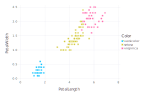

In [15]:
fps = Vector{String}(undef, length(fp.labels)) #指定长度固定的、类型固定的向量
for i = 1:length(fp.labels)
    if fp.labels[i] == 1
        fps[i] = "setosa"
    elseif fp.labels[i] == 2
        fps[i] = "versicolor"
    else
        fps[i] = "virginica"
    end
end

using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = fps, Geom.point)

# 高斯混合模型

In [1]:
using BetaML
using BetaML.Clustering

In [2]:
?BetaML.Clustering

```
Clustering module (WIP)
```

(Hard) Clustering algorithms

Provide hard clustering methods using K-means and k-medoids. Please see also the [`GMM`](@ref) module for GMM-mased soft clustering, missing values imputation / collaborative filtering / reccomendation systems using clustering methods as backend.

The module provides the following functions. Use `?[function]` to access their full signature and detailed documentation:

  * [`initRepresentatives(X,K;initStrategy,Z₀)`](@ref initRepresentatives): Initialisation strategies for Kmean and Kmedoids
  * [`kmeans(X,K;dist,initStrategy,Z₀)`](@ref kmeans): Classical KMean algorithm
  * [`kmedoids(X,K;dist,initStrategy,Z₀)`](@ref kmedoids): Kmedoids algorithm


In [16]:
features = Array(iris[:, 1:4])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [17]:
clusters = gmm(features,3)

Iter. 1:	Var. of the post  10.800659836302305 	  Log-likelihood -650.0952154782543
Iter. 20:	Var. of the post  0.0015053018521400427 	  Log-likelihood -375.1632787854873


(pₙₖ = [0.9999999999999958 4.133722139106853e-15 2.169043186261512e-31; 0.9999999999998685 1.3167874815528397e-13 6.188660957808529e-31; … ; 7.767168816832286e-29 0.00010623214024370111 0.9998937678597563; 1.5590355307865136e-20 0.5937325675630093 0.40626743243699076], pₖ = [0.33333372566184116; 0.400939328196311; 0.26572694614184783;;], mixtures = DiagonalGaussian{Float64}[DiagonalGaussian{Float64}([5.006000074958466, 3.427998879232667, 1.46200188519721, 0.24600098087272435], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829]), DiagonalGaussian{Float64}([5.9247917308877875, 2.748314564609235, 4.386292520577451, 1.399003451385245], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829]), DiagonalGaussian{Float64}([6.770794936386847, 3.058622062790989, 5.690157924001487, 2.0939442310935936], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829])], ϵ = [10.800659836302305, 2.056039260019547, 0.860

In [18]:
clusters.mixtures

3-element Vector{DiagonalGaussian{Float64}}:
 DiagonalGaussian{Float64}([5.006000074958466, 3.427998879232667, 1.46200188519721, 0.24600098087272435], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829])
 DiagonalGaussian{Float64}([5.9247917308877875, 2.748314564609235, 4.386292520577451, 1.399003451385245], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829])
 DiagonalGaussian{Float64}([6.770794936386847, 3.058622062790989, 5.690157924001487, 2.0939442310935936], [0.3039919620927364, 0.08358827851737258, 0.26140821097330935, 0.06082043120353829])

In [6]:
clusters.pₙₖ #每个点 i 属于集群 j 的概率的大小矩阵 (N x K)

150×3 Matrix{Float64}:
 1.0          4.13372e-15  2.16904e-31
 1.0          1.31679e-13  6.18866e-31
 1.0          4.62259e-15  1.58881e-32
 1.0          7.21806e-14  3.51364e-31
 1.0          1.355e-15    7.80242e-32
 1.0          5.0312e-13   1.17867e-26
 1.0          1.36925e-14  3.86457e-31
 1.0          2.10886e-14  9.51714e-31
 1.0          6.55161e-14  5.28315e-32
 1.0          2.6847e-14   9.60708e-32
 1.0          6.16134e-15  2.57784e-30
 1.0          3.52658e-14  1.50212e-30
 1.0          1.46199e-14  1.65934e-32
 ⋮                         
 4.62847e-19  0.831664     0.168336
 1.54374e-28  0.000453103  0.999547
 2.13555e-33  9.46661e-6   0.999991
 4.53887e-29  0.000205922  0.999794
 3.03523e-22  0.652218     0.347782
 3.0304e-34   3.47123e-6   0.999997
 4.91315e-35  8.72779e-7   0.999999
 1.84835e-29  0.000316218  0.999684
 3.81606e-23  0.617411     0.382589
 5.27786e-25  0.0167189    0.983281
 7.76717e-29  0.000106232  0.999894
 1.55904e-20  0.593733     0.406267

In [7]:
idx = []
for i = 1:size(clusters.pₙₖ)[1]
    if maximum(clusters.pₙₖ[i, :]) == clusters.pₙₖ[i,1]
        append!(idx, 1)
    elseif maximum(clusters.pₙₖ[i, :]) == clusters.pₙₖ[i,2]
        append!(idx, 2)
    else
        append!(idx, 3)
    end
end

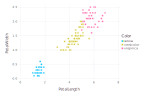

In [17]:
fps = Vector{String}(undef, length(idx)) #指定长度固定的、类型固定的向量
for i = 1:length(idx)
    if idx[i] == 1
        fps[i] = "setosa"
    elseif idx[i] == 2
        fps[i] = "versicolor"
    else
        fps[i] = "virginica"
    end
end
using Gadfly
plot(iris, x = "PetalLength", y = "PetalWidth", color = fps, Geom.point)

# 隐马尔可夫模型

In [1]:
using HMMBase

In [9]:
names(HMMBase)

30-element Vector{Symbol}:
 :AbstractHMM
 :HMM
 :HMMBase
 :backward
 :compute_transition_matrix
 :copy
 :fit_mle
 :forward
 :forward_backward
 :gettransmat
 :istransmat
 :likelihoods
 :log_likelihoods
 ⋮
 :messages_forwards_log
 :n_parameters
 :nparams
 :permute
 :posteriors
 :rand
 :rand_transition_matrix
 :randtransmat
 :remapseq
 :size
 :statdists
 :viterbi

In [2]:
?HMMBase.HMM

```
HMM([a, ]A, B) -> HMM
```

Build an HMM with transition matrix `A` and observation distributions `B`.   If the initial state distribution `a` is not specified, a uniform distribution is assumed. 

Observations distributions can be of different types (for example `Normal` and `Exponential`),   but they must be of the same dimension.

Alternatively, `B` can be an emission matrix where `B[i,j]` is the probability of observing symbol `j` in state `i`.

**Arguments**

  * `a::AbstractVector{T}`: initial probabilities vector.
  * `A::AbstractMatrix{T}`: transition matrix.
  * `B::AbstractVector{<:Distribution{F}}`: observations distributions.
  * or `B::AbstractMatrix`: emission matrix.

**Example**

```julia
using Distributions, HMMBase
# from distributions
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
# from an emission matrix
hmm = HMM([0.9 0.1; 0.1 0.9], [0. 0.5 0.5; 0.25 0.25 0.5])
```


In [18]:
#Baum-Welch算法
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000)
z = fit_mle(hmm, y)

(HMM{Univariate, Float64}([1.0, 9.28078982111211e-39], [0.9239302694135921 0.07606973058640783; 0.13043478260873198 0.869565217391268], UnivariateDistribution[Normal{Float64}(μ=0.0035303471226128774, σ=0.9760809624422806), Normal{Float64}(μ=10.026512032678571, σ=1.0395550633627382)]), HMMBase.EMHistory(true, 2, [-1730.187100626109, -1730.1871006261088]))

In [7]:
?fit_mle

search: fit_mle



```
fit_mle(D, x)
```

Fit a distribution of type `D` to a given data set `x`.

  * For univariate distribution, x can be an array of arbitrary size.
  * For multivariate distribution, x should be a matrix, where each column is a sample.

---

```
fit_mle(D, x, w)
```

Fit a distribution of type `D` to a weighted data set `x`, with weights given by `w`.

Here, `w` should be an array with length `n`, where `n` is the number of samples contained in `x`.

---

```
fit_mle(::Type{<:Beta}, x::AbstractArray{T})
```

Maximum Likelihood Estimate of `Beta` Distribution via Newton's Method

---

```
fit_mle(::Type{<:Weibull}, x::AbstractArray{<:Real}; 
alpha0::Real = 1, maxiter::Int = 1000, tol::Real = 1e-16)
```

Compute the maximum likelihood estimate of the [`Weibull`](@ref) distribution with Newton's method.

---

```
fit_mle(hmm, observations; ...) -> AbstractHMM
```

Estimate the HMM parameters using the EM (Baum-Welch) algorithm, with `hmm` as the initial state.

**Keyword Arguments**

  * `display::Symbol = :none`: when to display convergence logs, can be set to `:iter` or `:final`.
  * `init::Symbol = :none`: if set to `:kmeans` the HMM parameters will be initialized using a K-means clustering.
  * `maxiter::Integer = 100`: maximum number of iterations to perform.
  * `tol::Integer = 1e-3`: stop the algorithm when the improvement in the log-likelihood is less than `tol`.

**Output**

  * `<:AbstractHMM`: a copy of the original HMM with the updated parameters.


In [7]:
#概率计算问题
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000)
γ = posteriors(hmm, y)

1000×2 Matrix{Float64}:
 2.79541e-23  1.0
 3.79526e-26  1.0
 1.49047e-20  1.0
 3.53313e-21  1.0
 5.19849e-24  1.0
 2.81628e-24  1.0
 3.58669e-17  1.0
 2.07776e-27  1.0
 1.78686e-29  1.0
 8.00084e-25  1.0
 5.70632e-17  1.0
 1.0          1.32882e-20
 1.0          2.06638e-27
 ⋮            
 1.0          1.10692e-22
 1.0          1.05697e-18
 1.0          8.64424e-26
 1.0          4.81289e-32
 1.0          1.86986e-25
 1.0          2.60729e-24
 1.0          7.58702e-26
 1.0          1.09296e-31
 1.0          8.27453e-16
 1.0          8.20639e-25
 1.0          1.13095e-25
 1.0          1.1891e-21

In [16]:
?posteriors

search: posteriors



```
posteriors(α, β) -> Vector
```

Compute posterior probabilities from `α` and `β`.

**Arguments**

  * `α::AbstractVector`: forward probabilities.
  * `β::AbstractVector`: backward probabilities.

---

```
posteriors(a, A, LL; kwargs...) -> Vector
```

Compute posterior probabilities using samples likelihoods.

---

```
posteriors(hmm, observations; robust) -> Vector
```

Compute posterior probabilities using samples likelihoods.

**Example**

```julia
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000)
γ = posteriors(hmm, y)
```


In [2]:
#预测问题 viterbi算法
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])#给定隐马尔可夫模型，λ=[A，B，π]初始状态概率 π、状态转移概率 A、输出观测概率 B
y = rand(hmm, 1000)#产生观测序列
zv = viterbi(hmm, y)#根据观测序列求出状态序列，该模型只有两个状态

1000-element Vector{Int64}:
 2
 2
 2
 1
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 2
 1
 1
 1
 1
 2
 2
 2
 2
 2
 2

In [5]:
hmm
#[0.5, 0.5]初始状态概率，[0.9 0.1; 0.1 0.9]状态转移概率，UnivariateDistribution[Normal{Float64}(μ=0.0, σ=1.0), Normal{Float64}(μ=10.0, σ=1.0)]输出观测概率

HMM{Univariate, Float64}([0.5, 0.5], [0.9 0.1; 0.1 0.9], UnivariateDistribution[Normal{Float64}(μ=0.0, σ=1.0), Normal{Float64}(μ=10.0, σ=1.0)])

In [4]:
y

1000-element Vector{Float64}:
  9.11649706348904
 10.356482405272596
  8.796636346640767
  1.424423638437543
 13.050798622345056
  9.870051456369495
  9.637844103343236
  8.859857961576799
 12.219387993497229
 10.327965241073896
  9.698636168313023
 10.092302315989118
  8.94214206791108
  ⋮
 -0.0959956165024929
  9.017810146121123
 -0.9500134174670679
 -1.2337713904204881
 -0.6223226428635839
 -0.2379037337018247
 10.734511264383134
  9.433791109404993
 11.227456088184104
  9.131278130208898
  7.6900729895096305
  8.809395369785303

In [5]:
#学习问题
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000)
LL = loglikelihoods(hmm, y)

1000×2 Matrix{Float64}:
 -47.5121    -0.979038
 -52.6713    -0.934029
 -43.8812    -1.18572
 -52.5117    -0.931424
 -51.234     -0.919433
 -57.9381    -1.14937
 -49.0013    -0.937686
 -41.9242    -1.36454
 -52.3801    -0.92946
 -28.1542    -4.35004
 -67.8213    -2.14731
 -61.6624    -1.44129
 -59.4368    -1.25375
   ⋮        
 -42.6286    -1.29442
 -41.5862    -1.40055
 -61.7391    -1.44843
 -61.8005    -1.45418
 -41.9306    -1.36387
 -70.7225    -2.56704
 -50.8775    -0.918947
 -54.007     -0.9652
 -53.8451    -0.960541
  -1.37416  -41.8325
  -0.95707  -48.1955
  -1.59557  -39.9626

In [6]:
?loglikelihoods

search: loglikelihoods log_likelihoods loglikelihood



```
loglikelihoods(hmm, observations; robust) -> Matrix
```

Return the log-likelihood per-state and per-observation.

**Output**

  * `Matrix{Float64}`: log-likelihoods matrix (`T x K`).

**Example**

```julia
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000)
LL = likelihoods(hmm, y)
```


In [14]:
using Distributions, HMMBase
hmm = HMM([0.9 0.1; 0.1 0.9], [Normal(0,1), Normal(10,1)])
y = rand(hmm, 1000) # or
z, y = rand(hmm, 1000, seq = true)

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [8.761834163773305, 10.532486107478103, 9.336702907917108, 9.028993259726342, 10.085327303184028, 10.439020424549483, 10.22751209681243, 10.782034337894158, 11.309355362584741, 10.351641070531706  …  0.5597832058355634, -0.16730217788044335, -0.01044337702805696, -0.46629186270672535, -2.1798451280674187, -1.948362374423706, 0.4670233060679581, -0.6330515826593149, -0.48539214998908947, 0.6425642875479262])

In [15]:
y

1000-element Vector{Float64}:
  8.761834163773305
 10.532486107478103
  9.336702907917108
  9.028993259726342
 10.085327303184028
 10.439020424549483
 10.22751209681243
 10.782034337894158
 11.309355362584741
 10.351641070531706
 11.356710421164962
 10.952885067276528
 10.876463710513297
  ⋮
 -0.9015194918125033
  0.20590509674717763
  0.5597832058355634
 -0.16730217788044335
 -0.01044337702805696
 -0.46629186270672535
 -2.1798451280674187
 -1.948362374423706
  0.4670233060679581
 -0.6330515826593149
 -0.48539214998908947
  0.6425642875479262